In [1]:
import squidpy as sq
import scanpy as sc

/home/cheng-wei_liao/miniconda3/envs/master_prak/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/cheng-wei_liao/miniconda3/envs/master_prak/lib/python3.11/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [2]:
# encode book
category_encoding = {
    'Astro-Epen': 0,
    'CB GABA': 1,
    'CB Glut': 2,
    'CGE GABA': 3,
    'CNU GABA': 4,
    'CNU-HYa GABA': 5,
    'CNU-HYa Glut': 6,
    'HY GABA': 7,
    'HY Glut': 8,
    'HY Gnrh1 Glut': 9,
    'HY MM Glut': 10,
    'IT-ET Glut': 11,
    'Immune': 12,
    'LQ': 13,
    'LSX GABA': 14,
    'MB Dopa': 15,
    'MB GABA': 16,
    'MB Glut': 17,
    'MB-HB Sero': 18,
    'MGE GABA': 19,
    'MH-LH Glut': 20,
    'MOB-CR Glut': 21,
    'MOB-DG-IMN': 22,
    'MY GABA': 23,
    'MY Glut': 24,
    'NP-CT-L6b Glut': 25,
    'OEG': 26,
    'Oligo': 27,
    'P GABA': 28,
    'P Glut': 29,
    'Pineal Glut': 30,
    'TH Glut': 31,
    'Vascular': 32
}

        

In [14]:
# PATHS
#DATA_PATH = "./data/subset_6img_atlas_brain.h5ad"
DATA_PATH = "./data/atlas_brain_638850_CCF.h5ad"


In [15]:
adata = sc.read(DATA_PATH)

In [5]:
adata.obs.section

1015221640100570419      1199650929
1015221640100590598      1199650929
1015221640100820600      1199650929
1015221640100580476      1199650929
1015221640100580189      1199650929
                            ...    
1015221640102020089      1199650944
1015221640100700440-2    1199650944
1015221640101580242      1199650944
1015221640100850138-2    1199650944
1015221640101460056      1199650944
Name: section, Length: 240945, dtype: category
Categories (6, object): ['1199650929', '1199650932', '1199650935', '1199650938', '1199650941', '1199650944']

/tmp/ipykernel_1781748/883516090.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


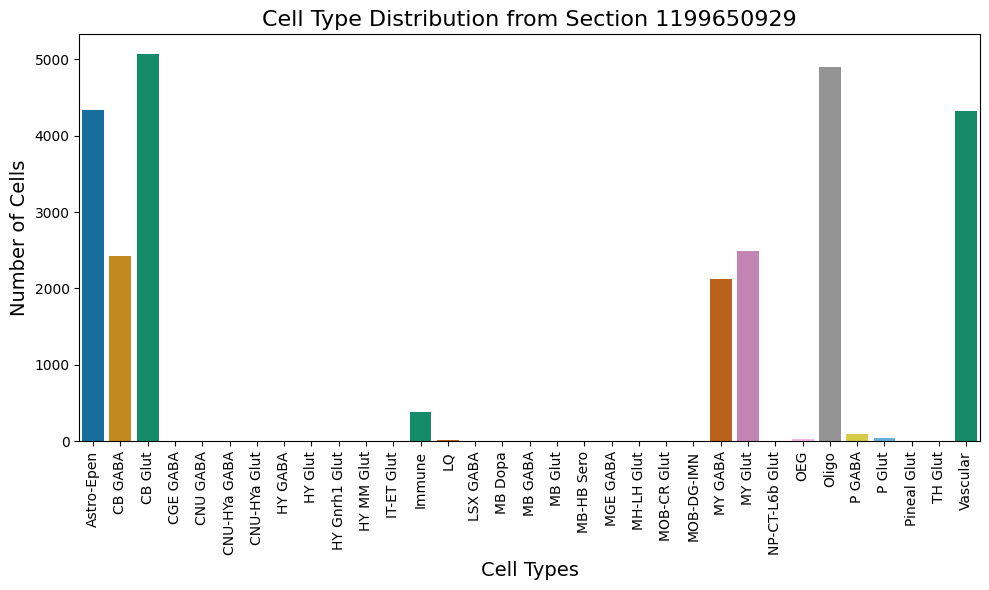

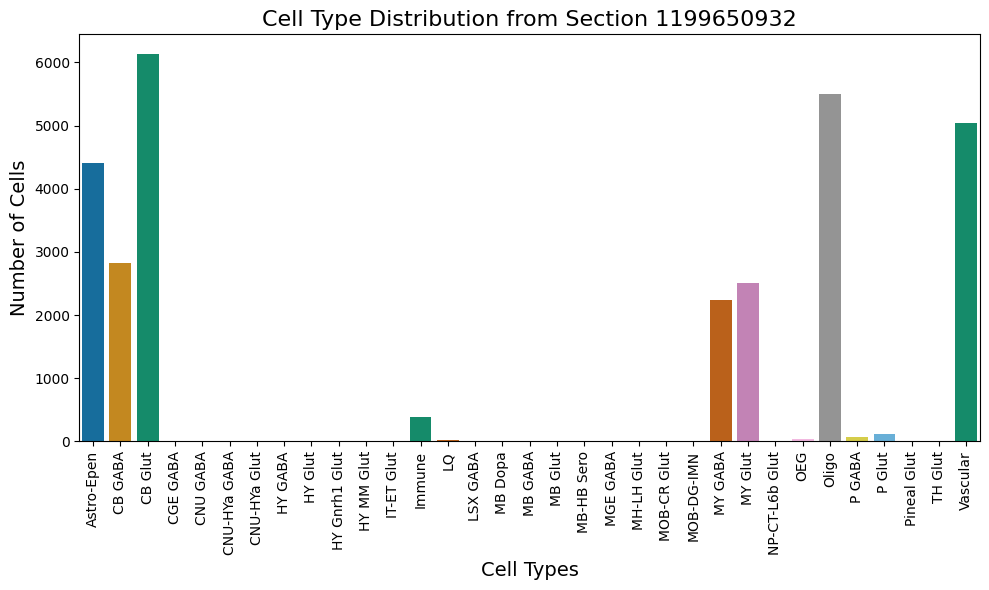

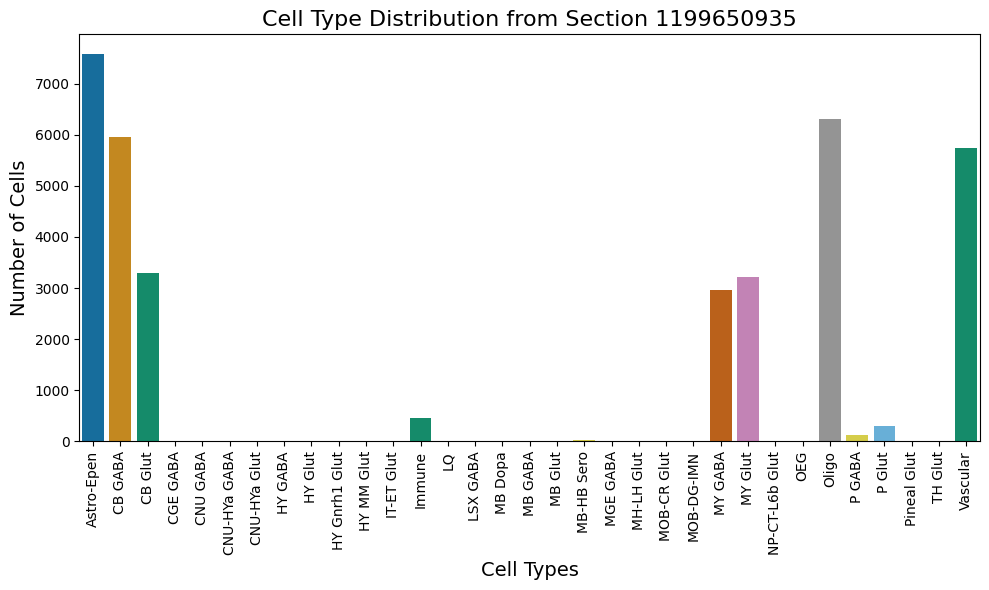

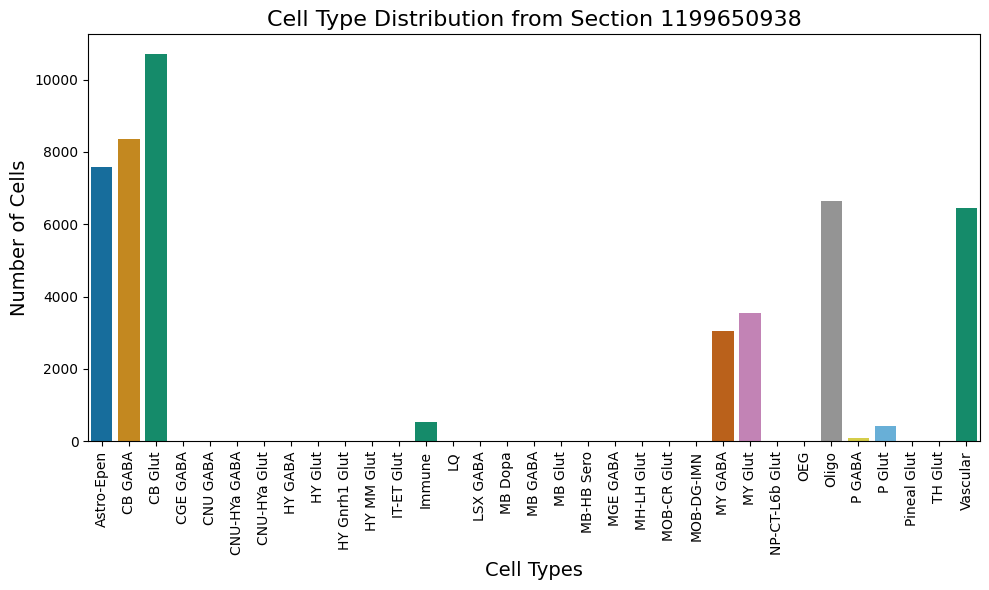

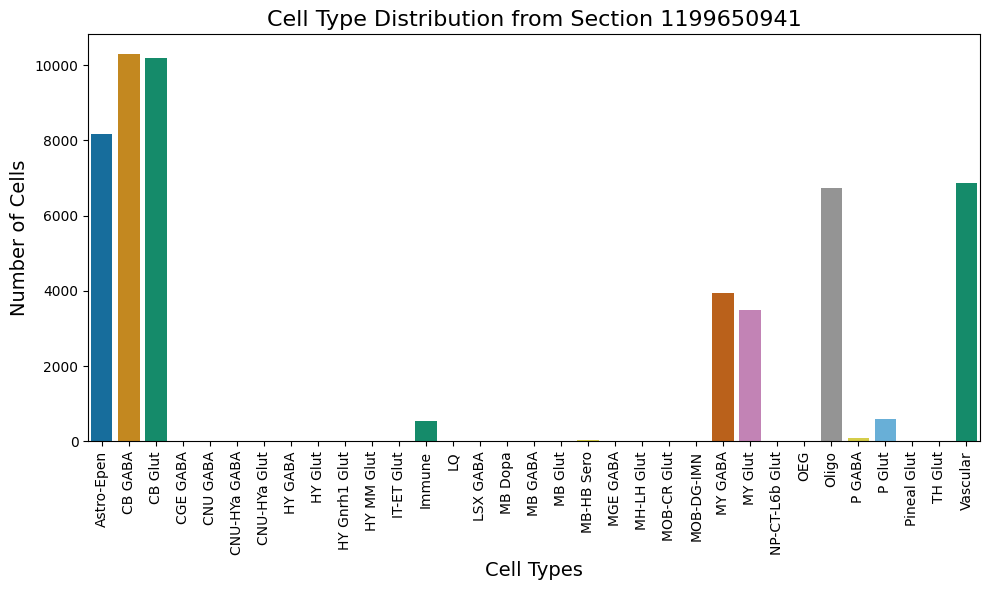

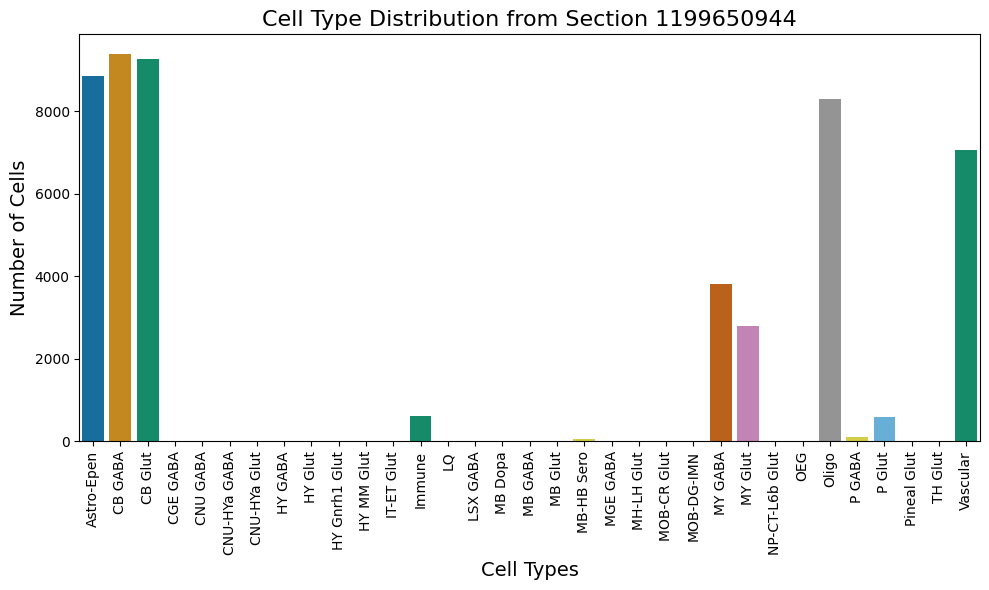

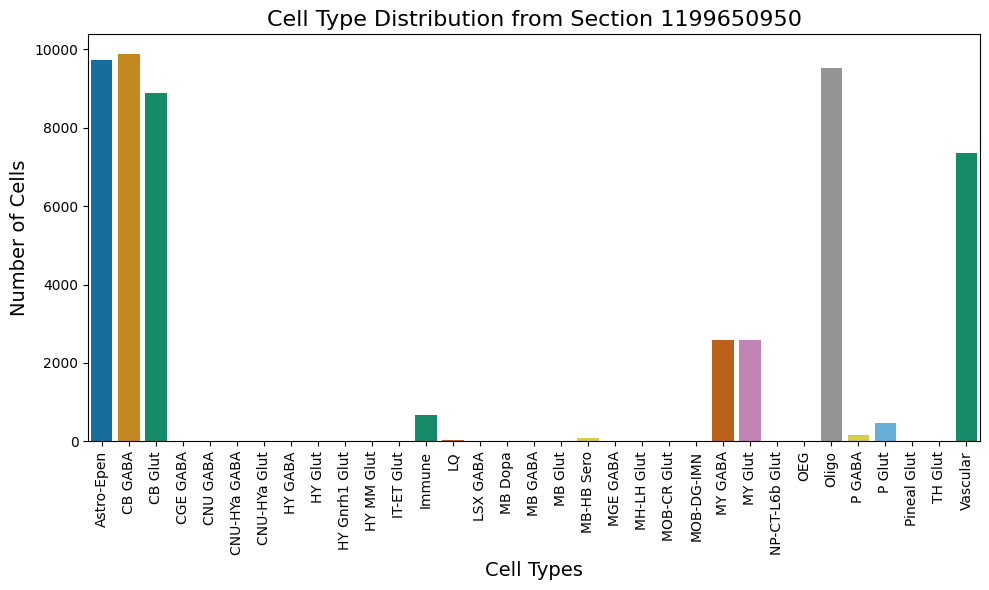

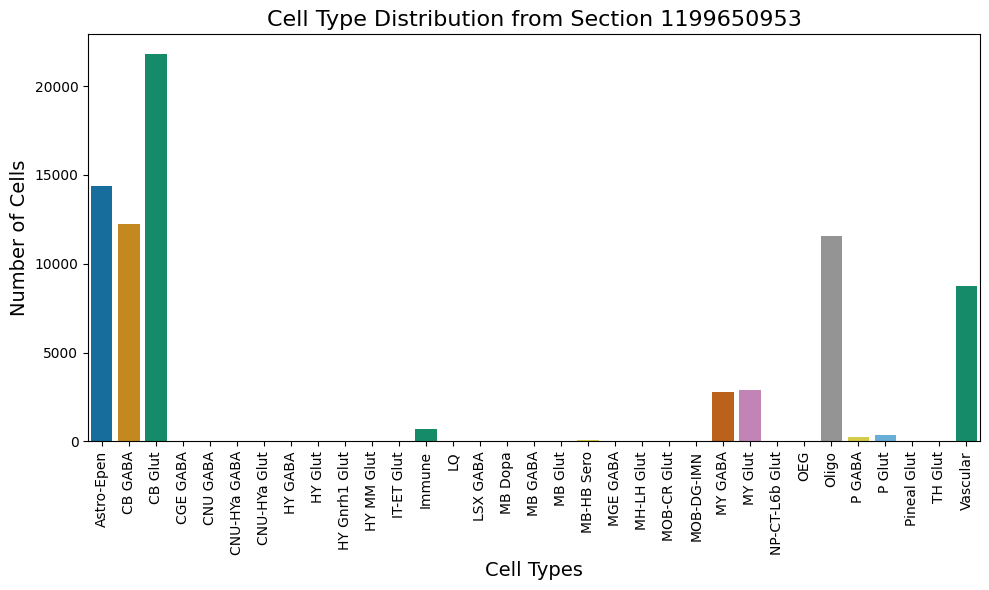

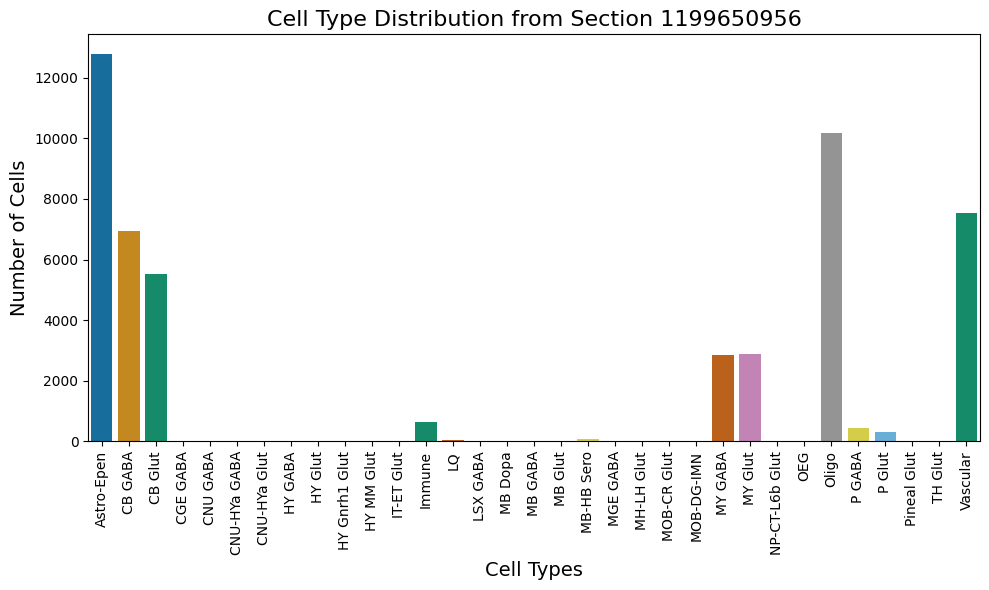

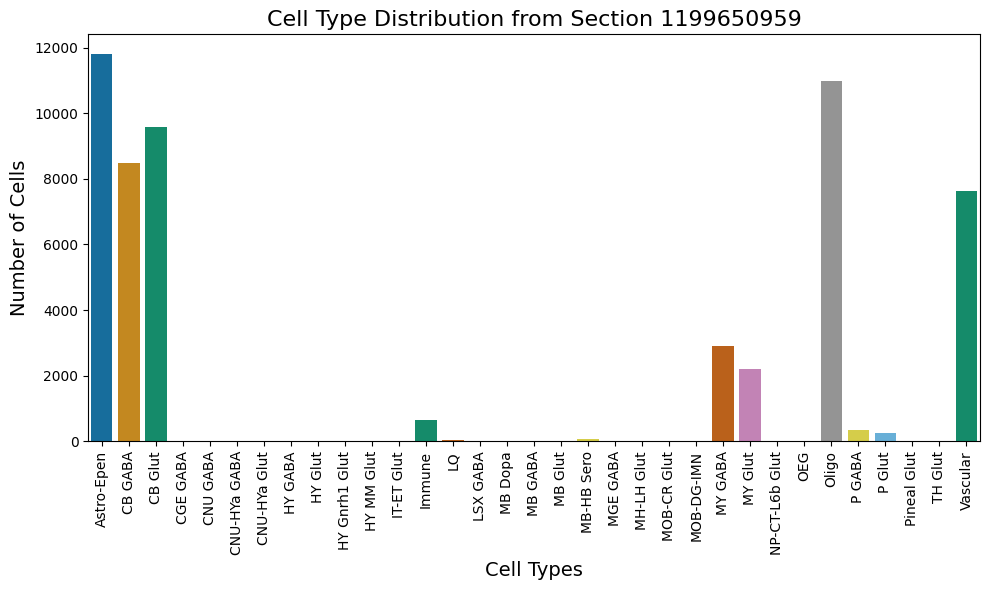

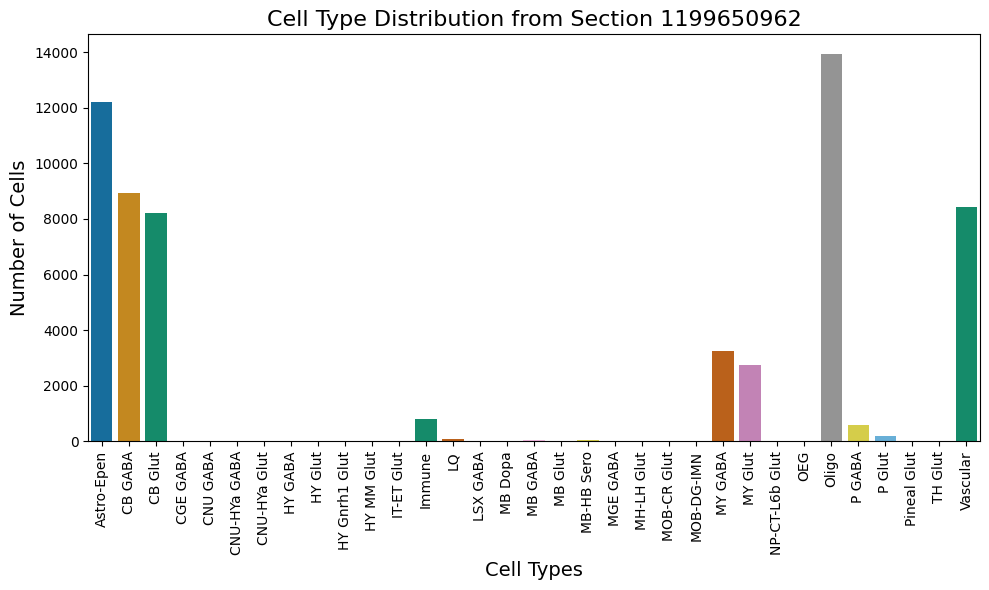

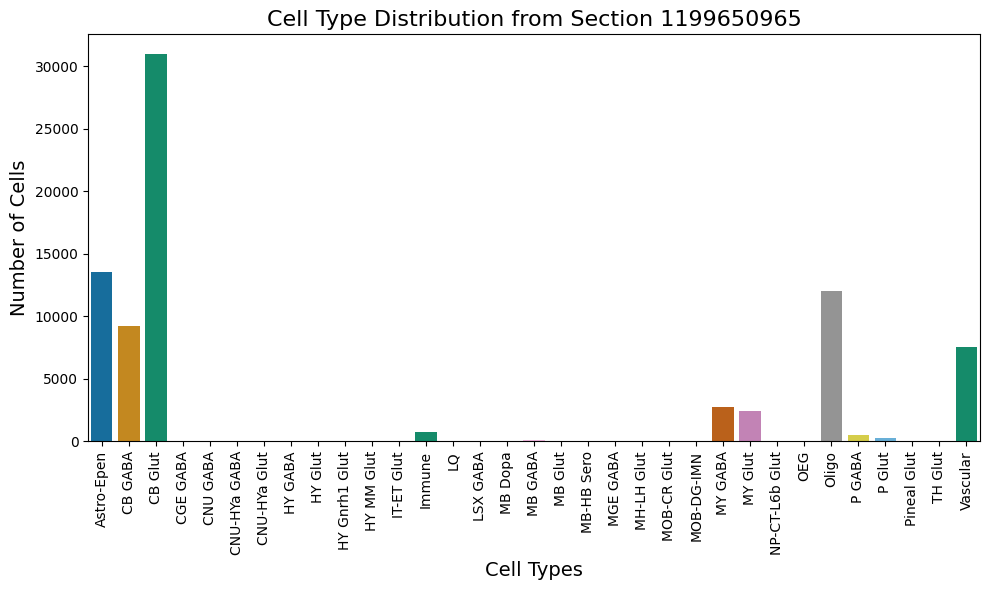

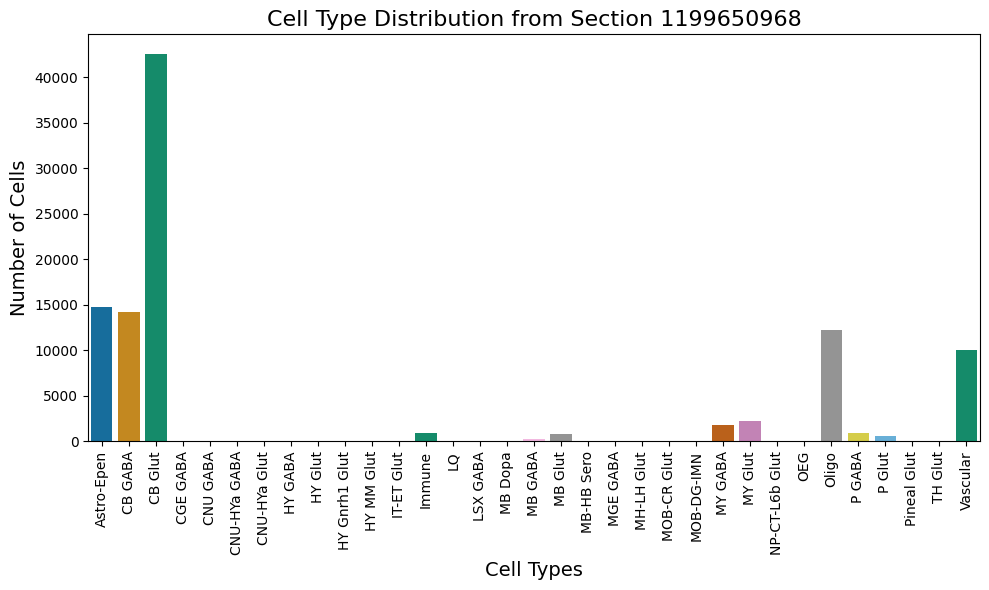

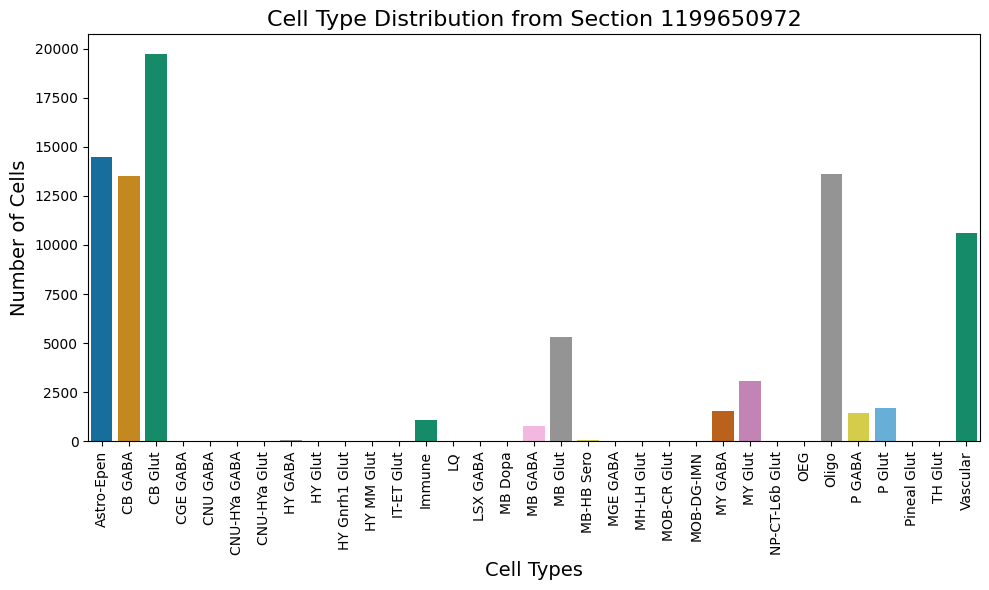

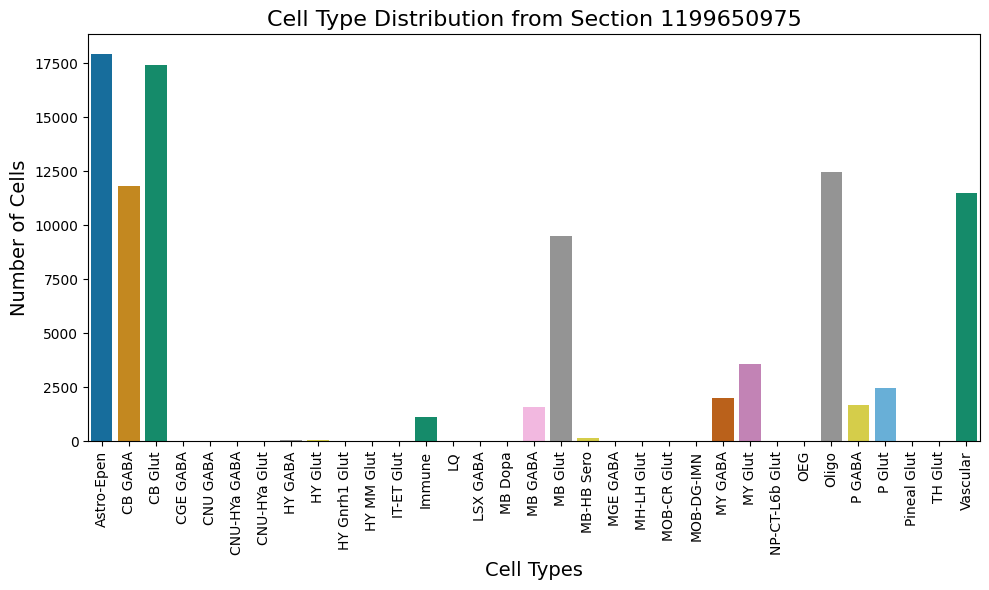

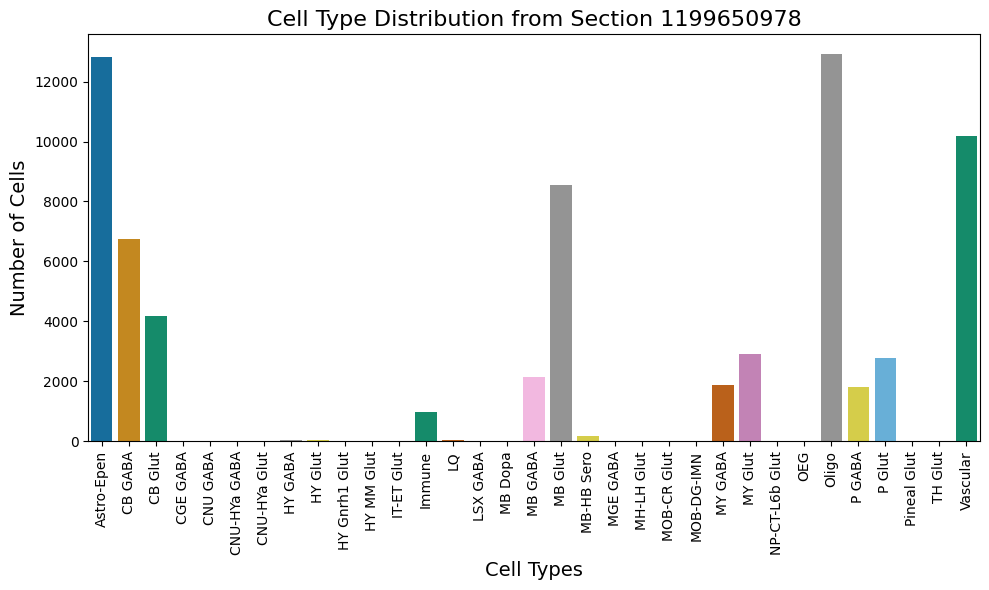

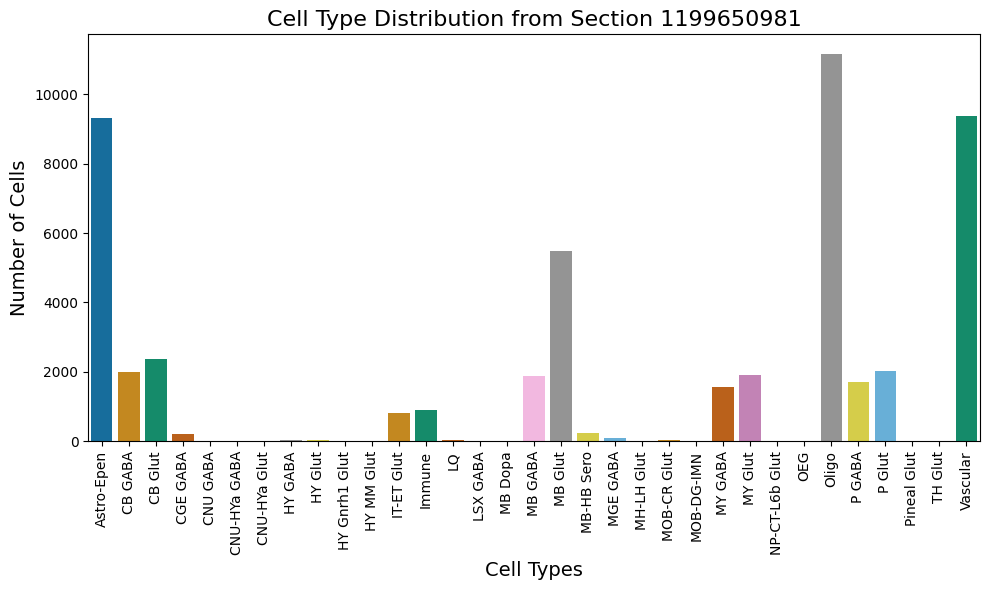

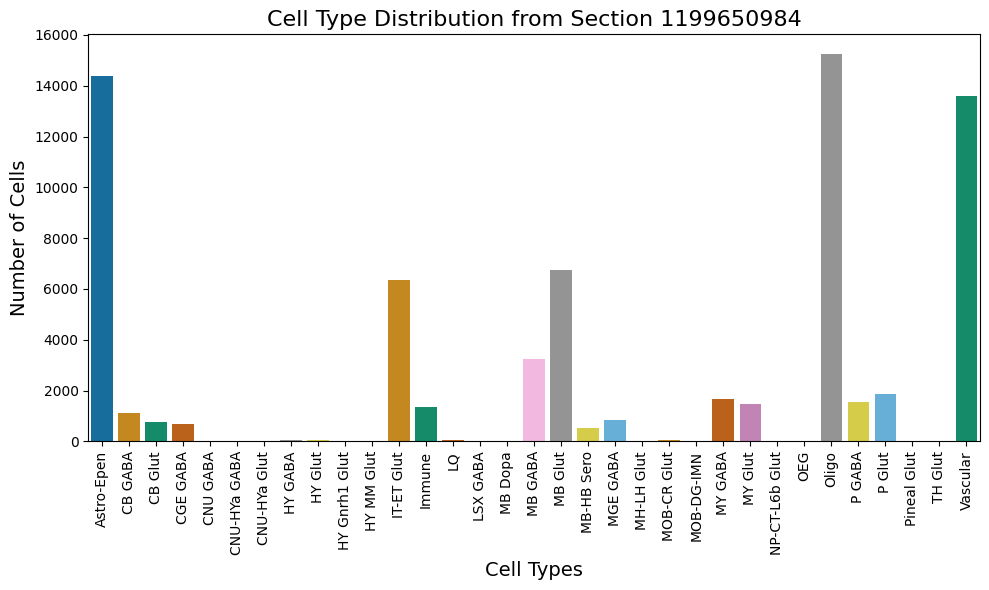

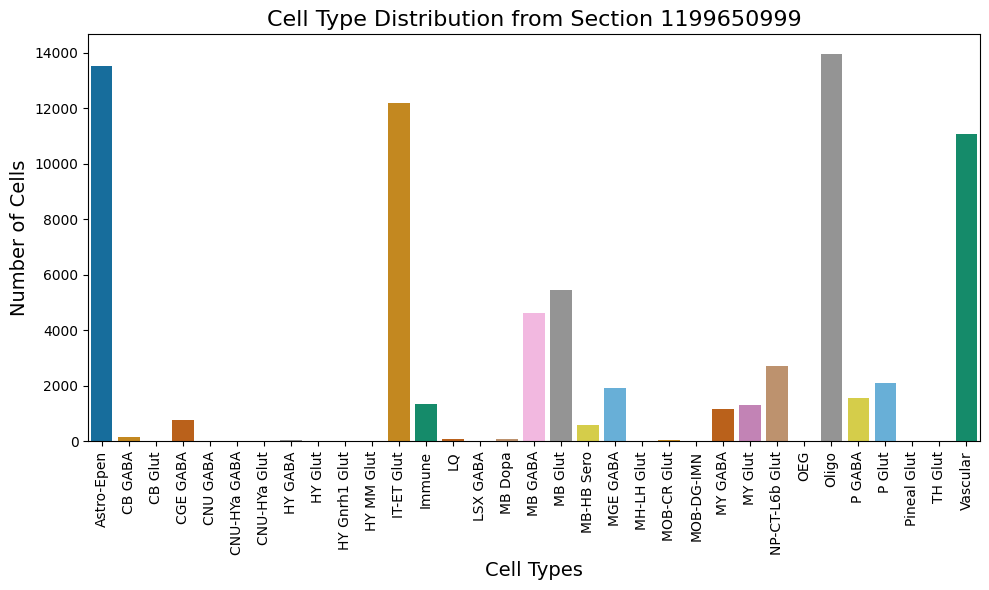

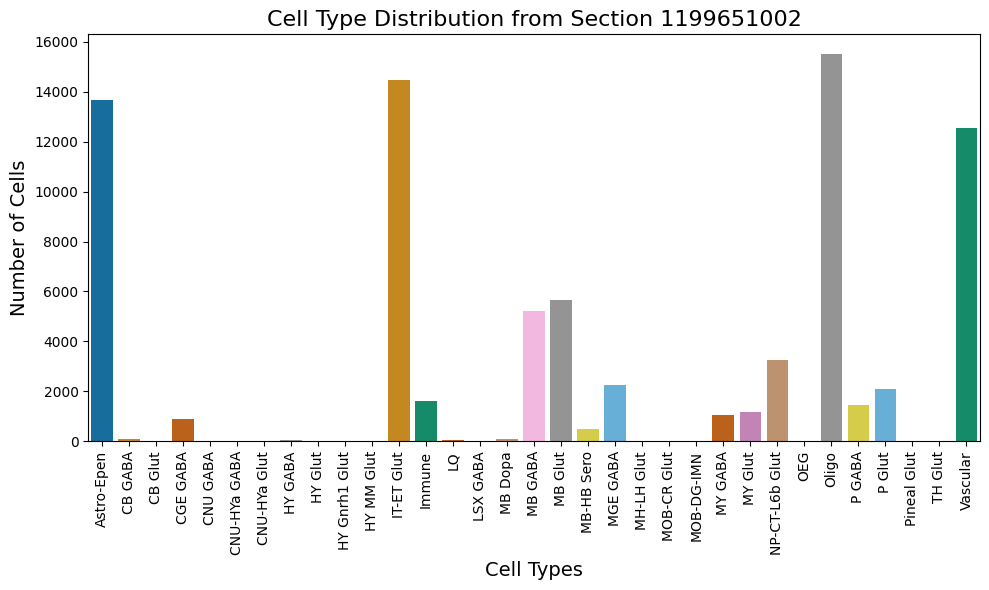

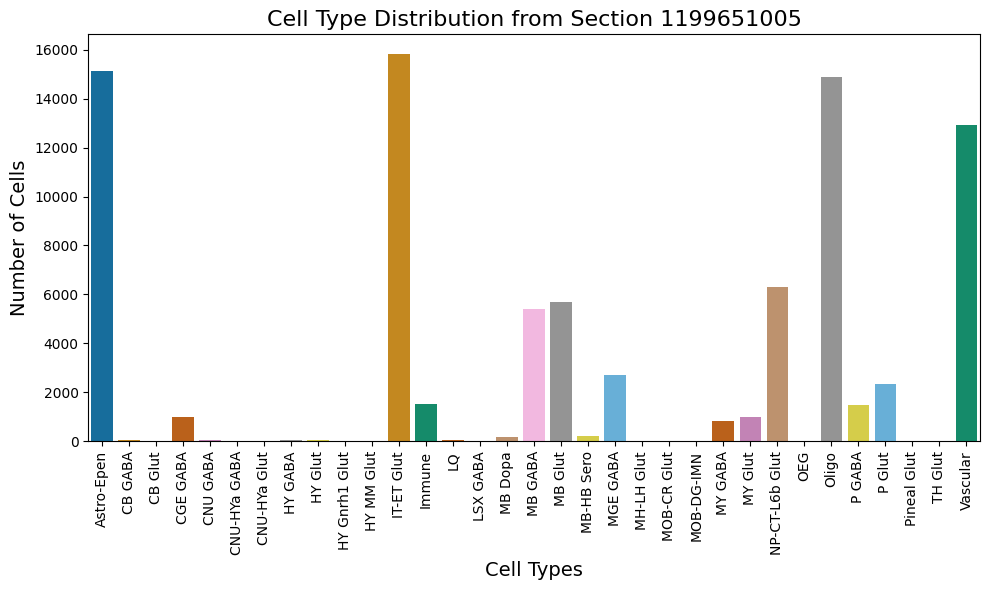

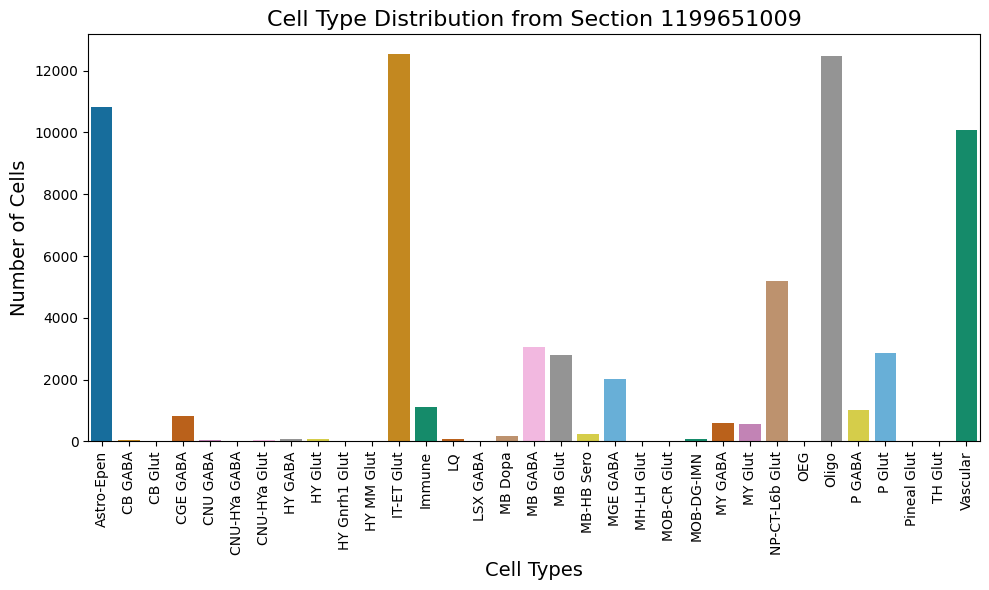

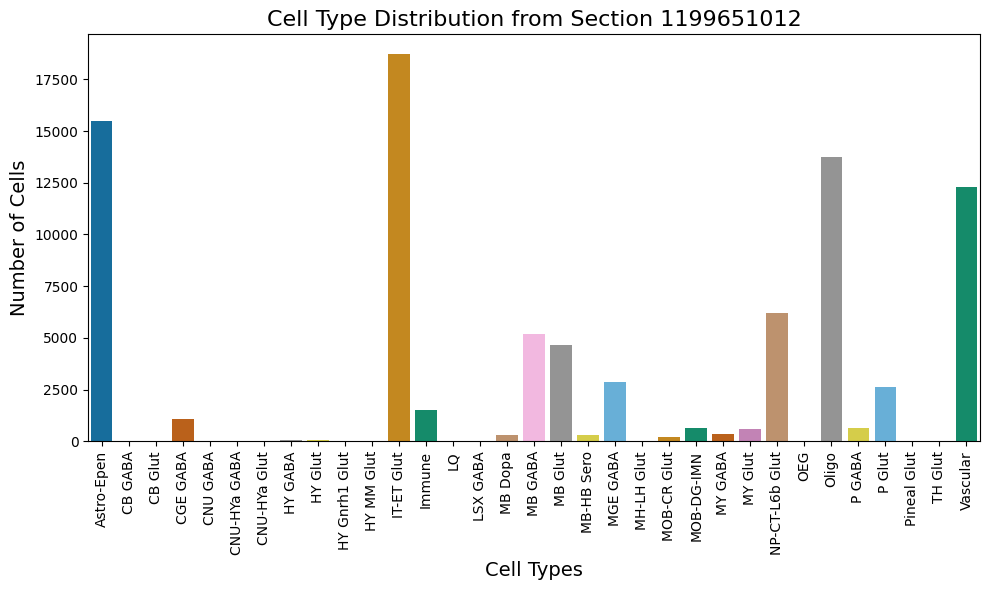

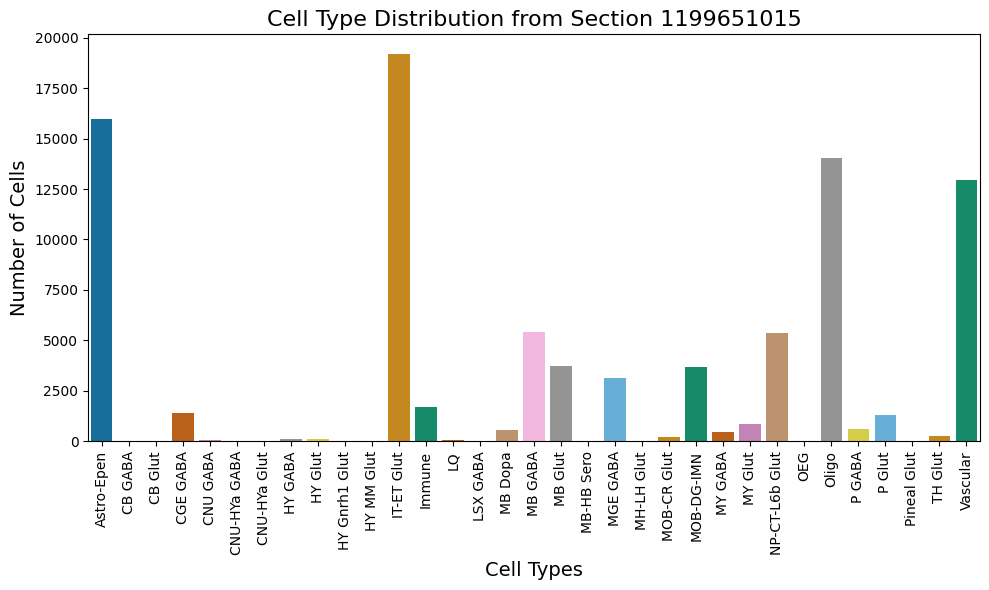

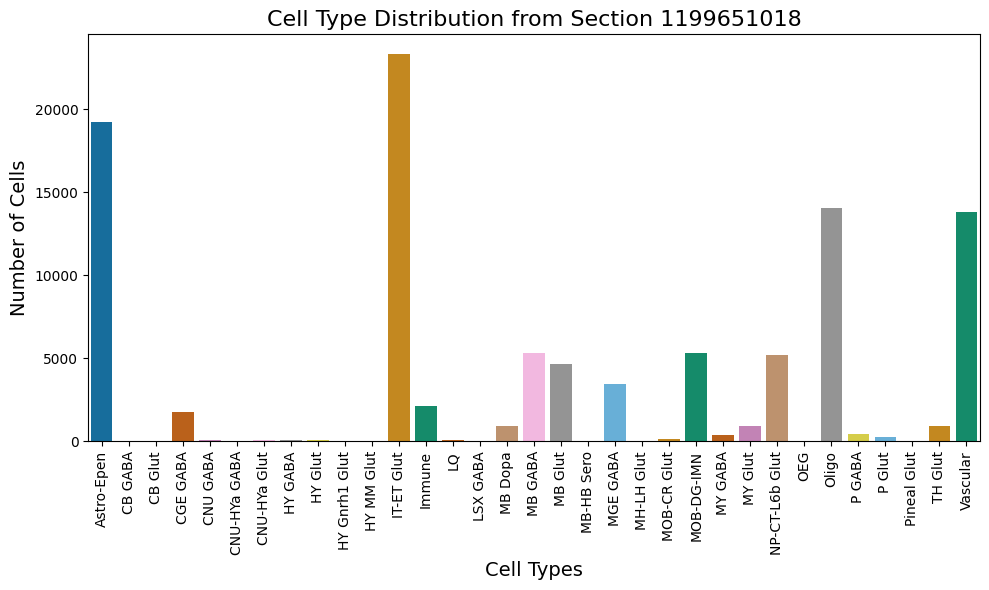

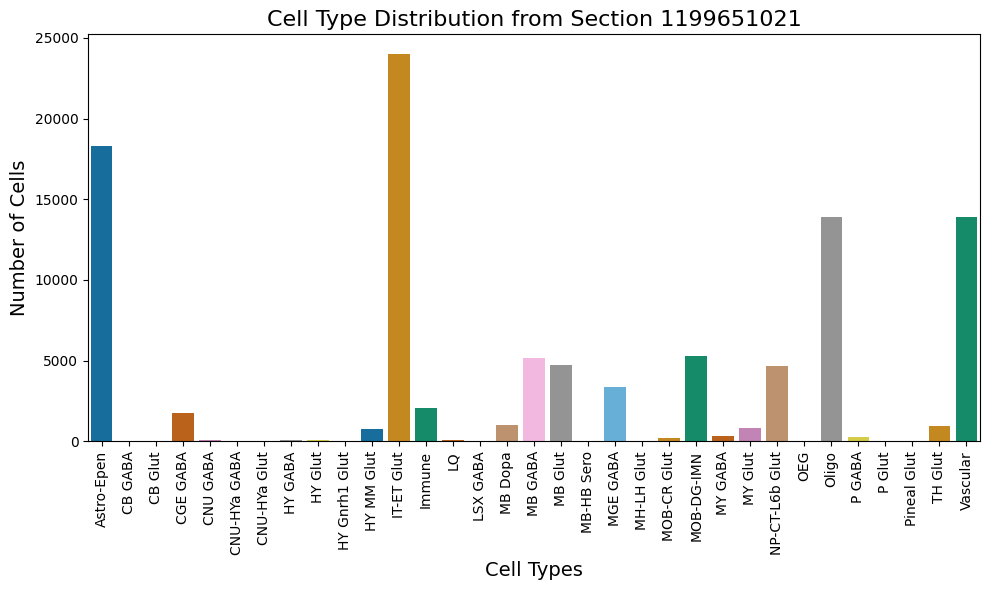

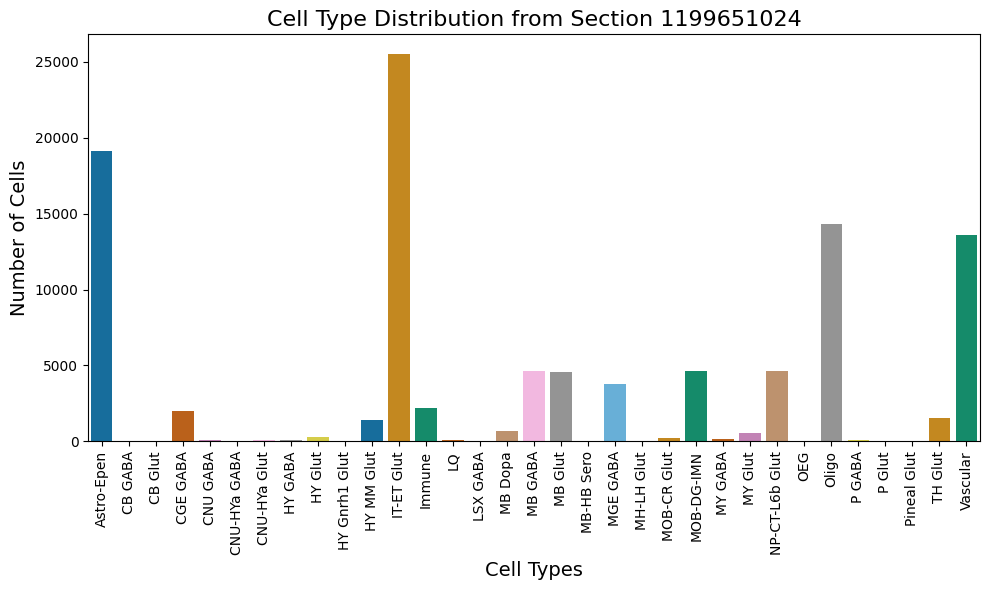

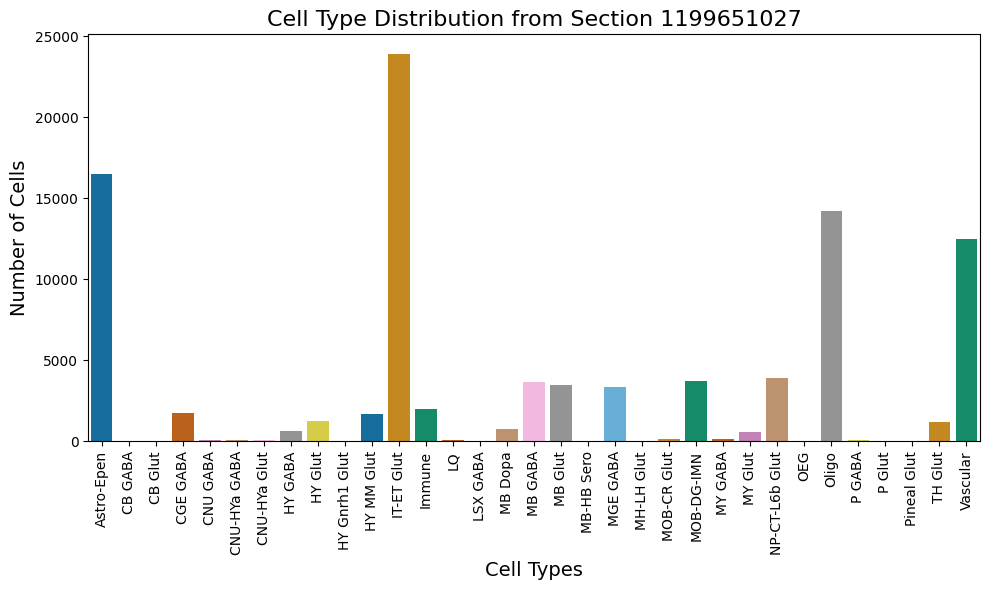

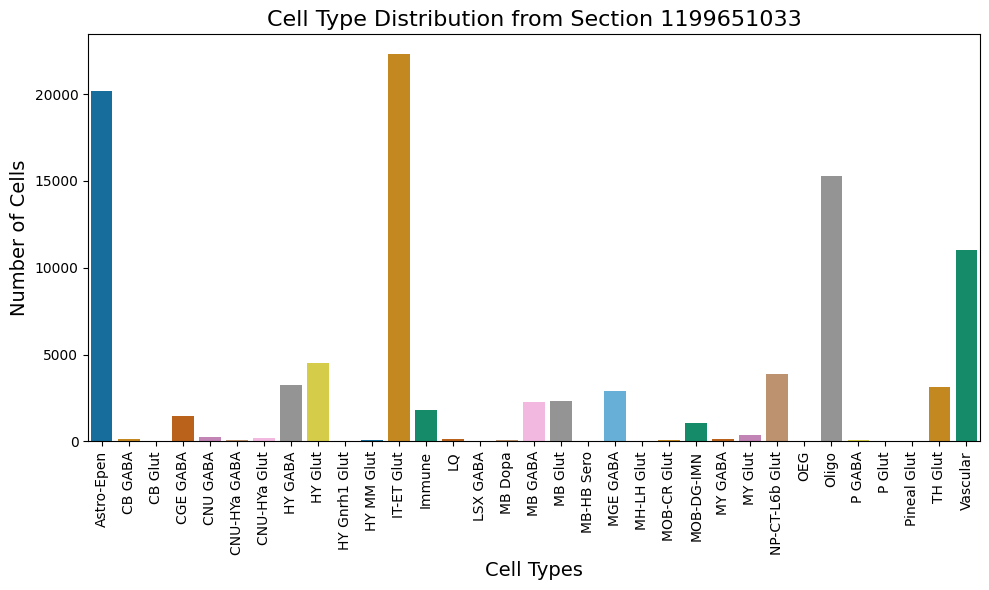

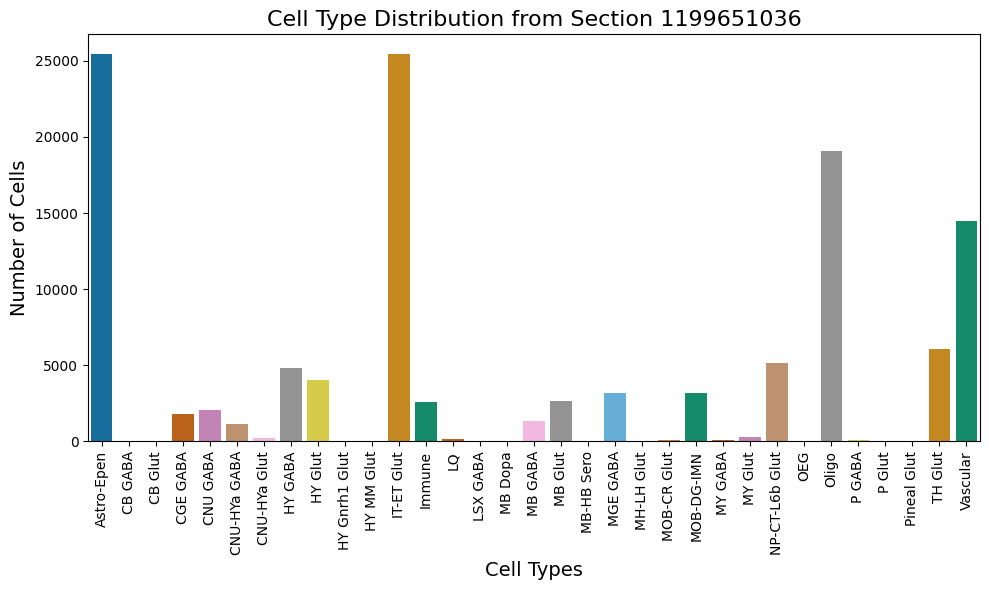

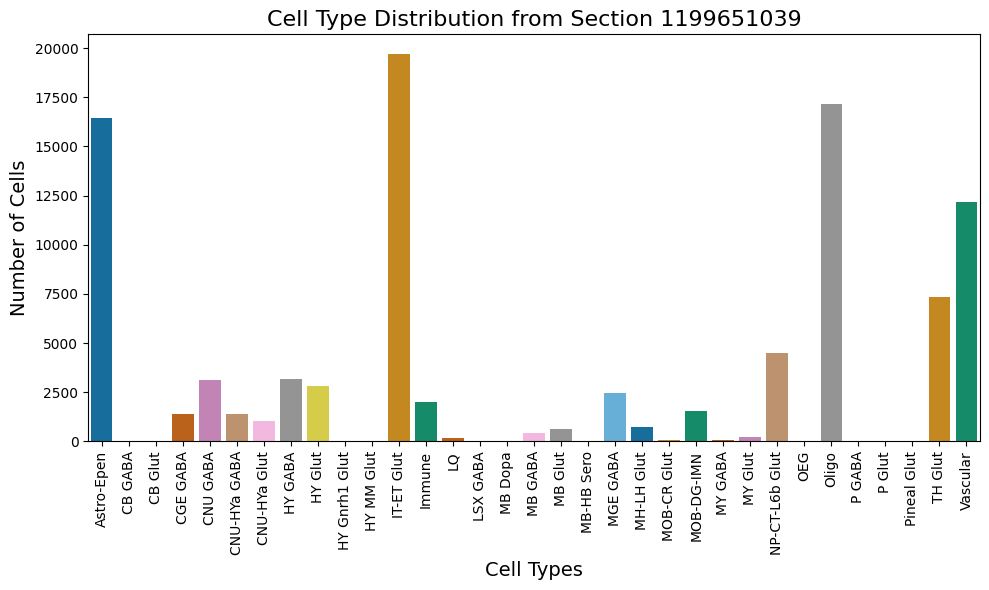

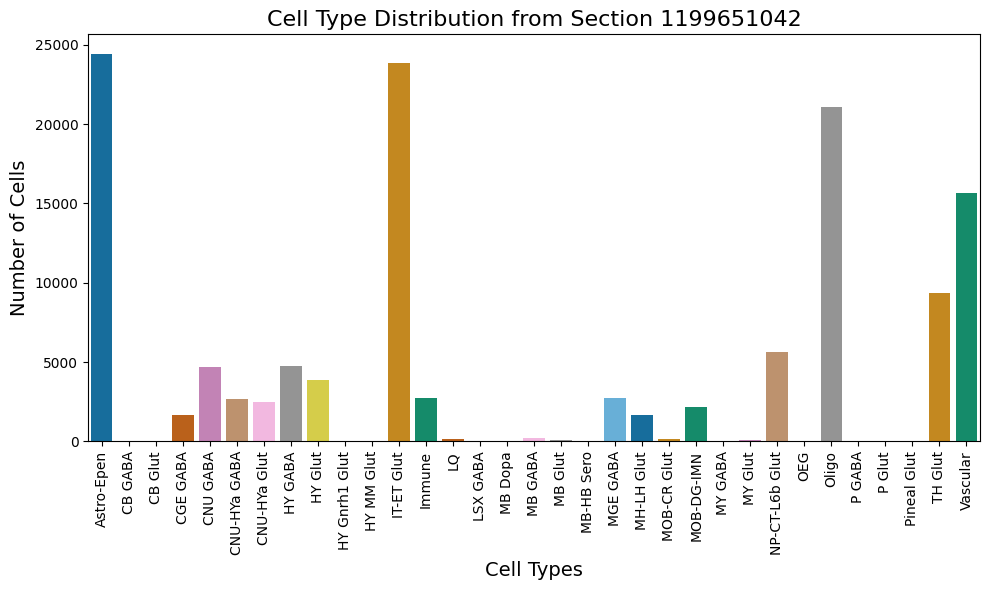

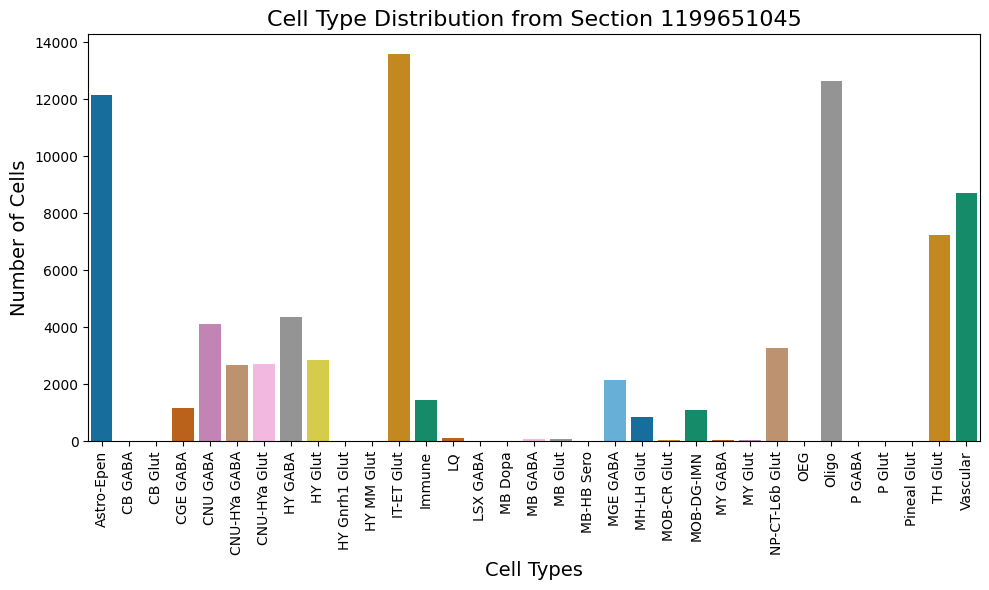

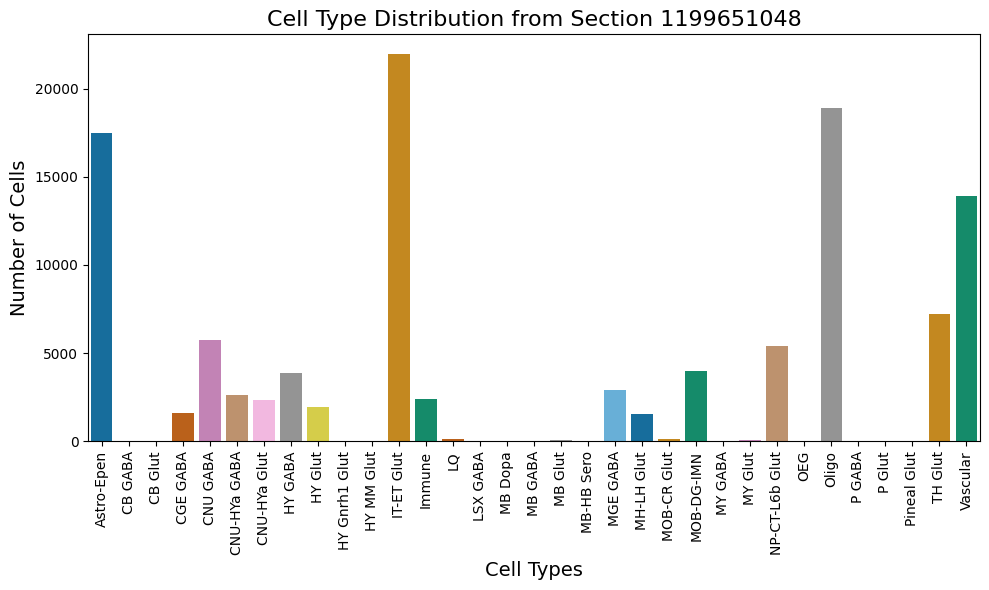

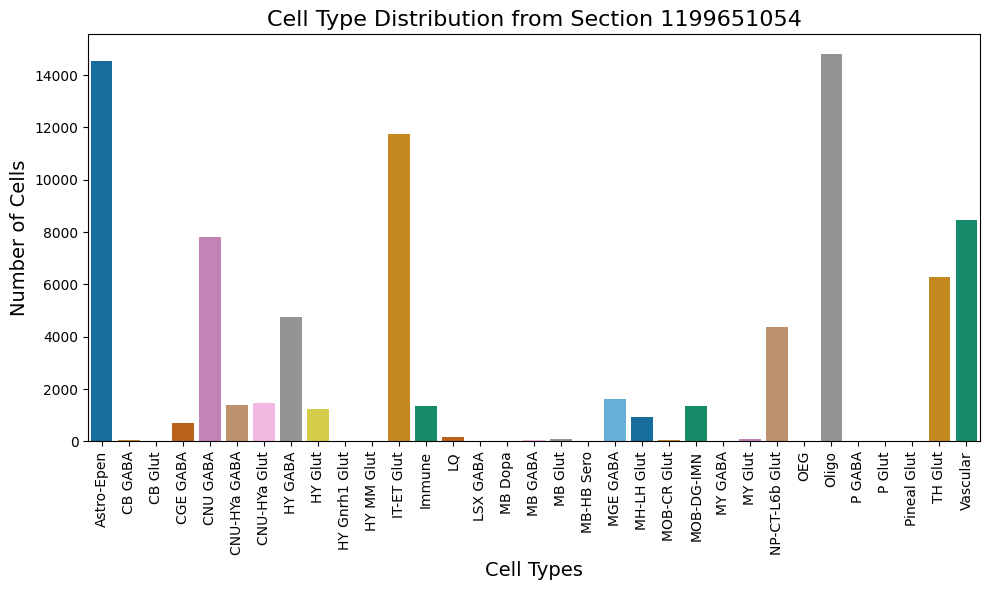

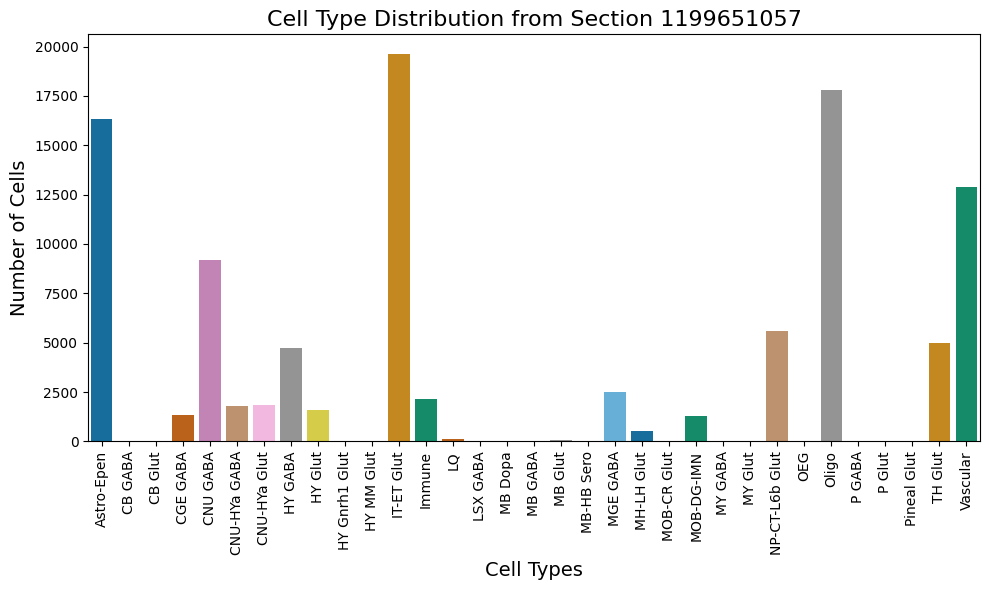

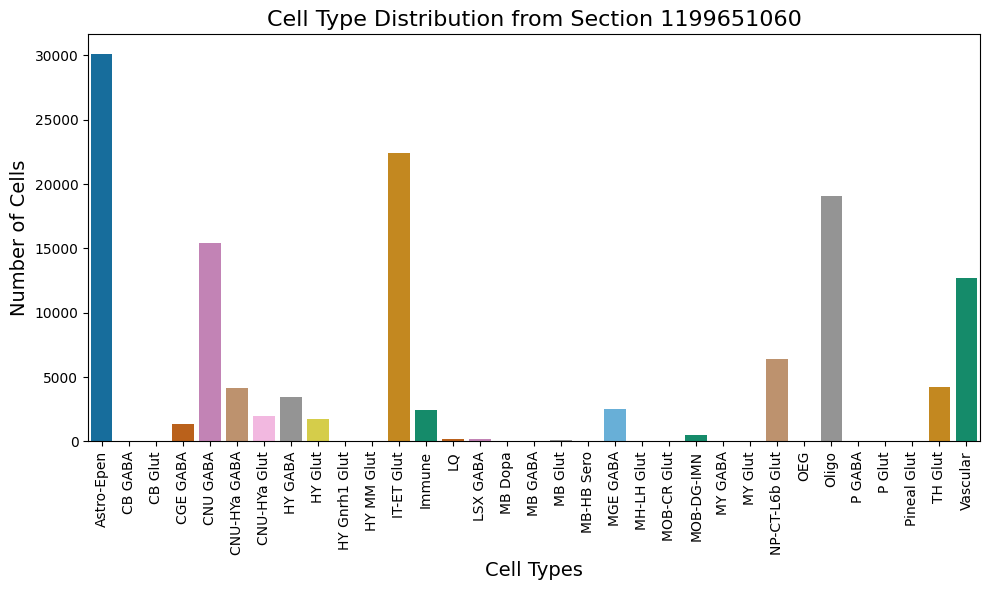

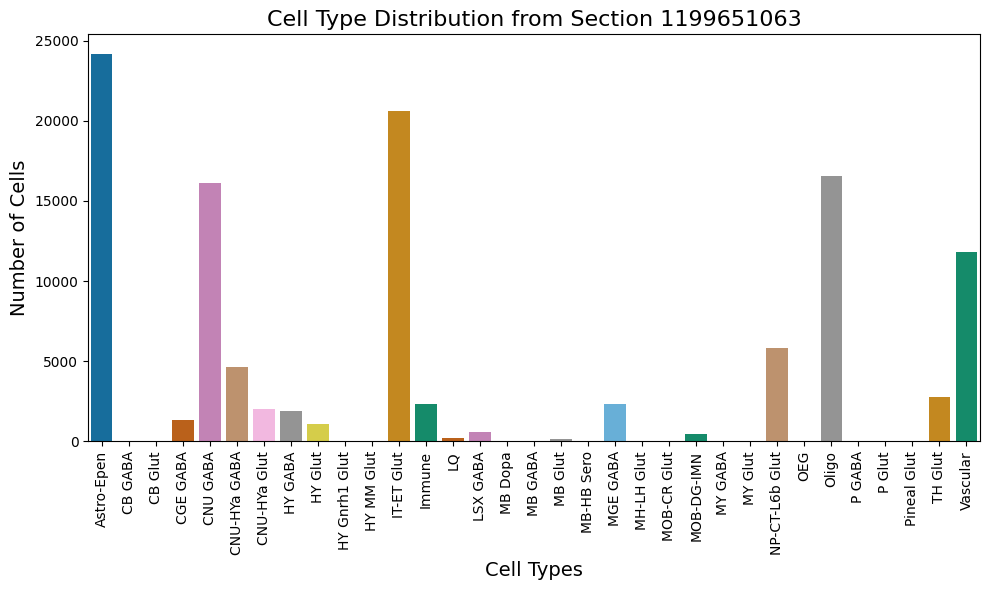

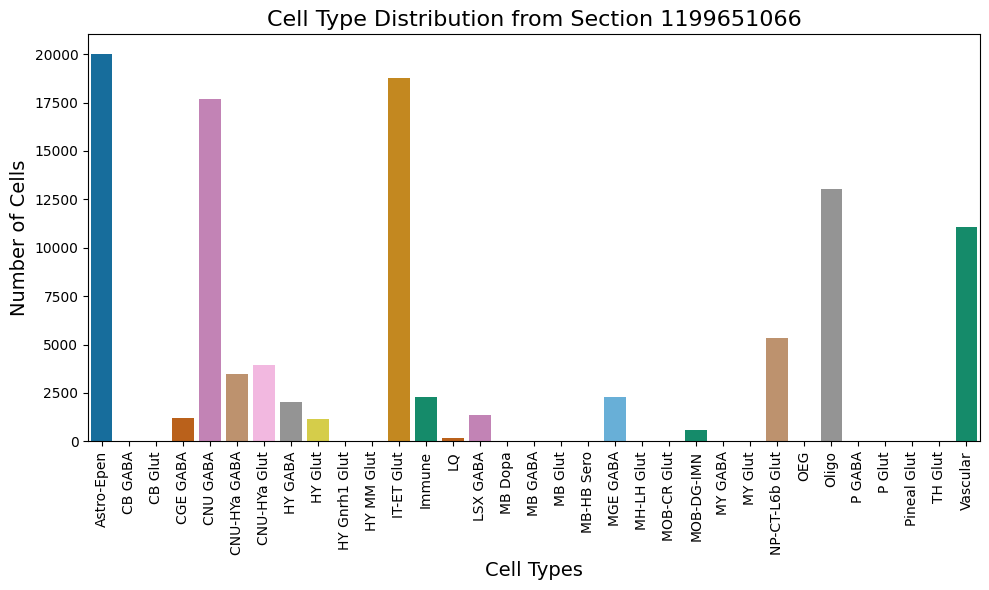

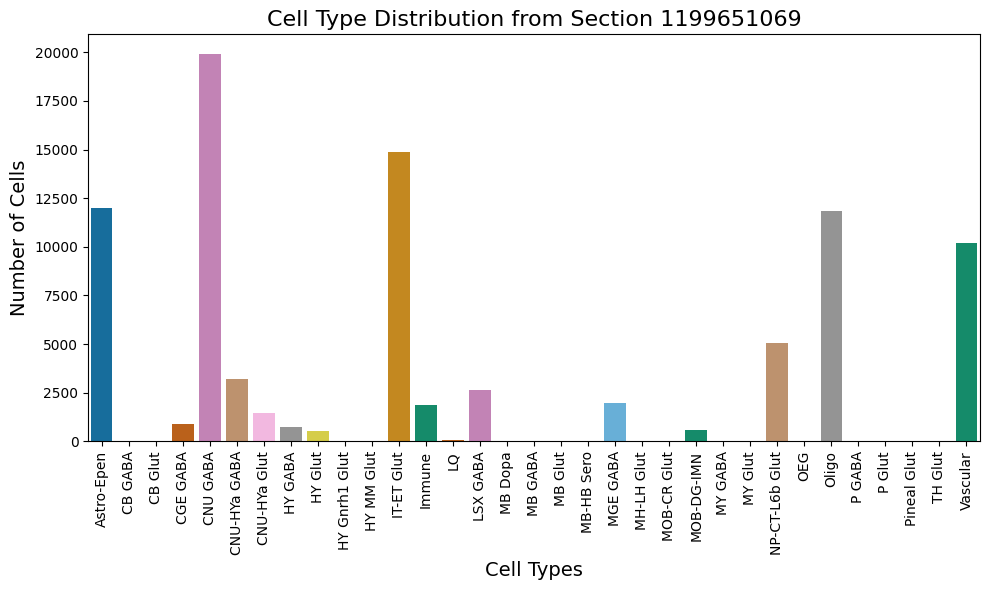

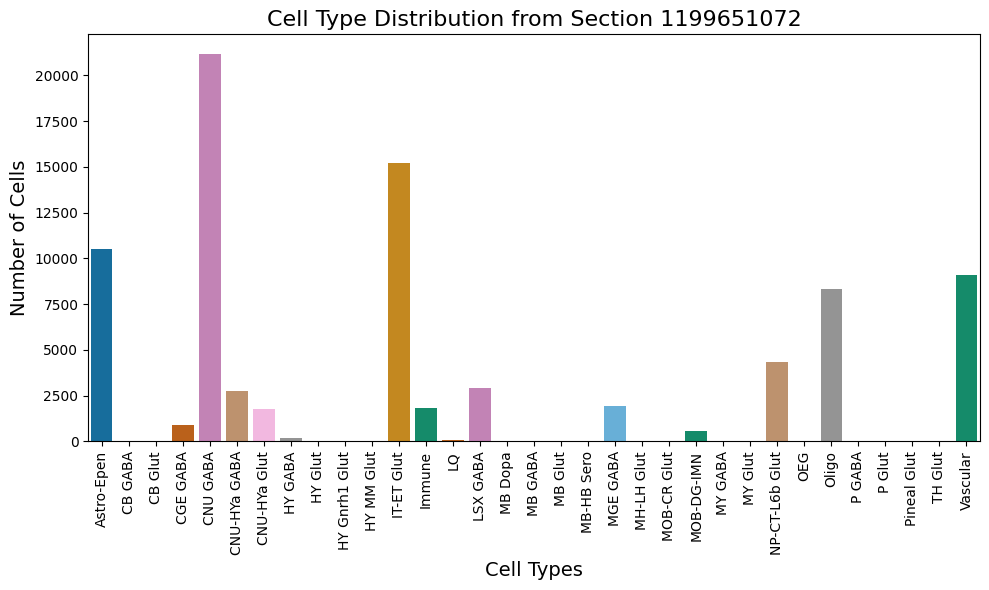

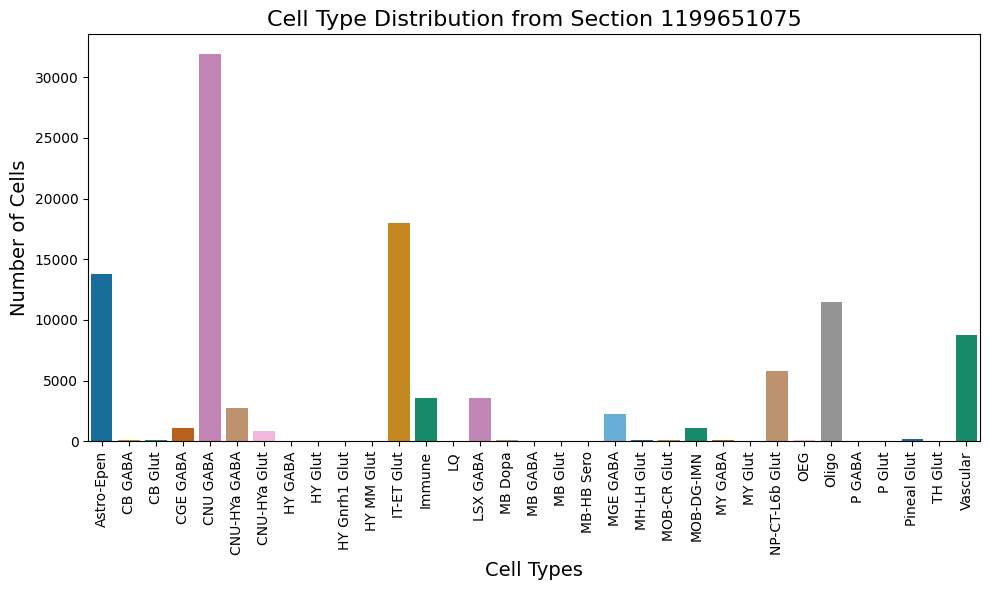

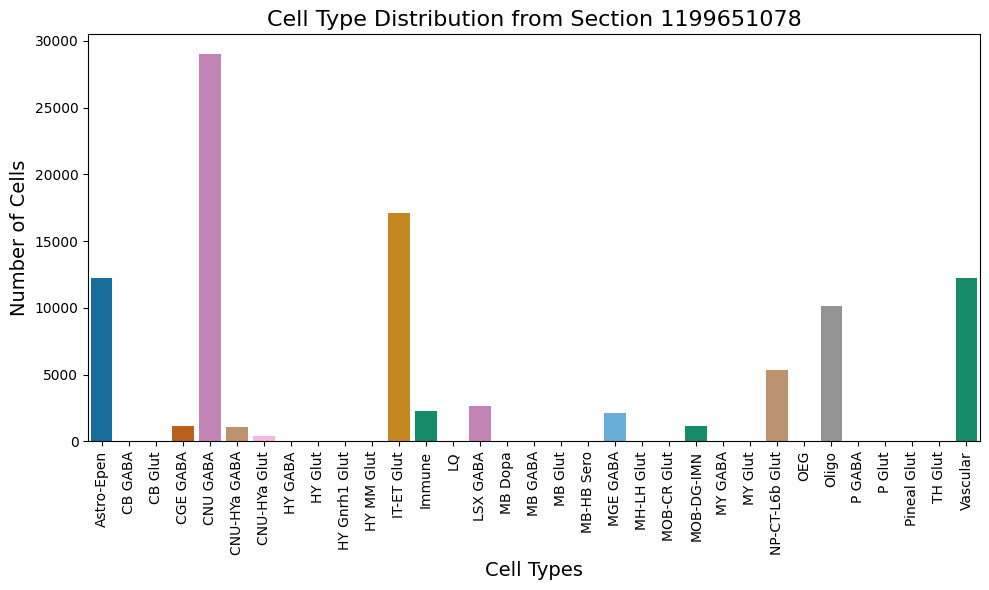

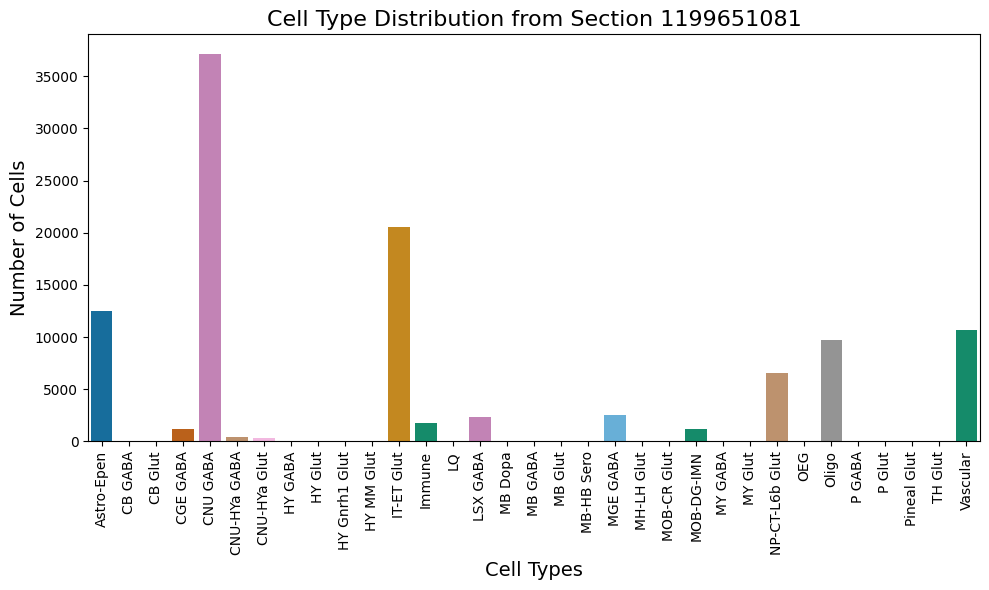

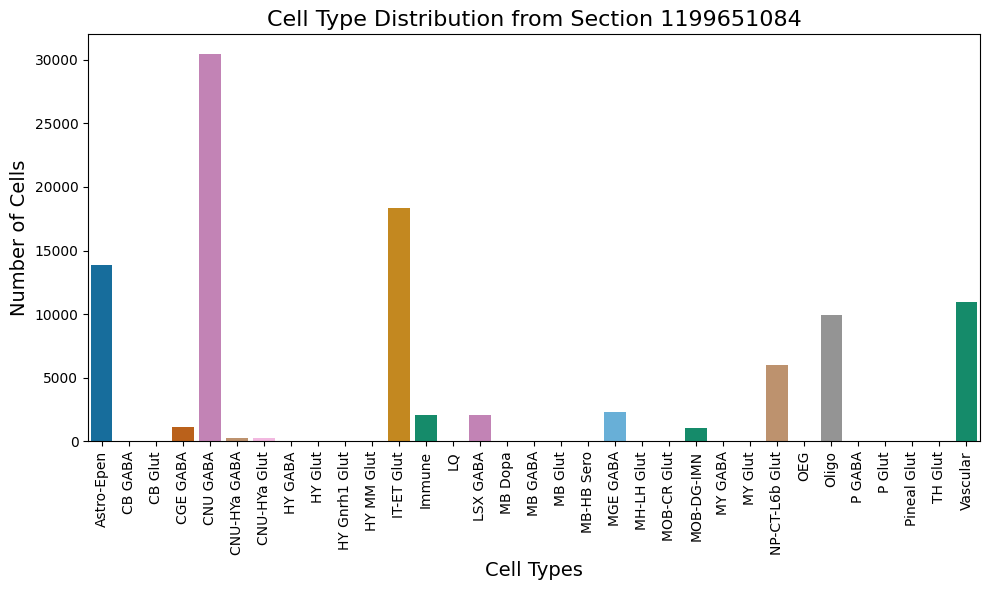

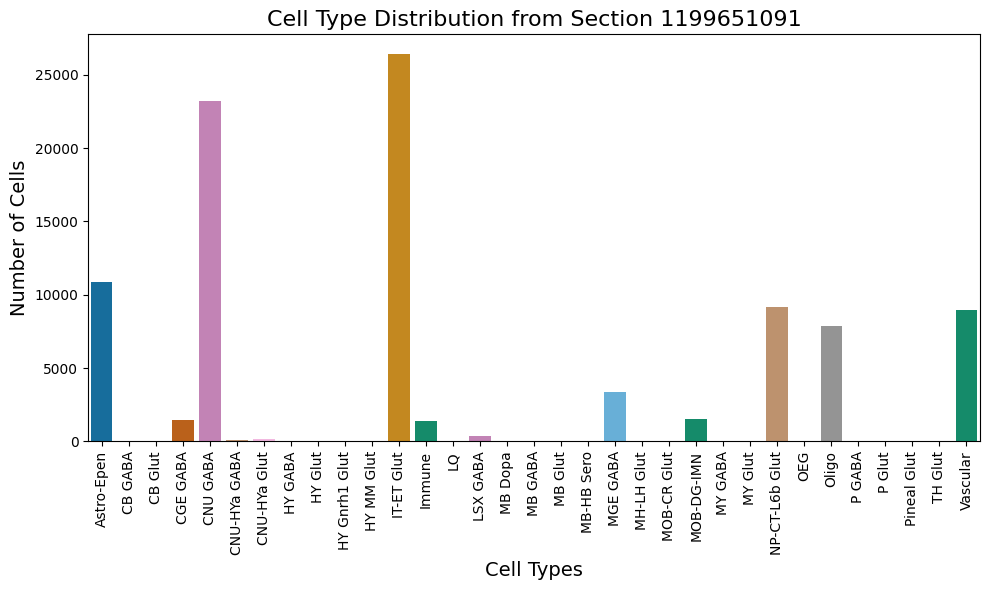

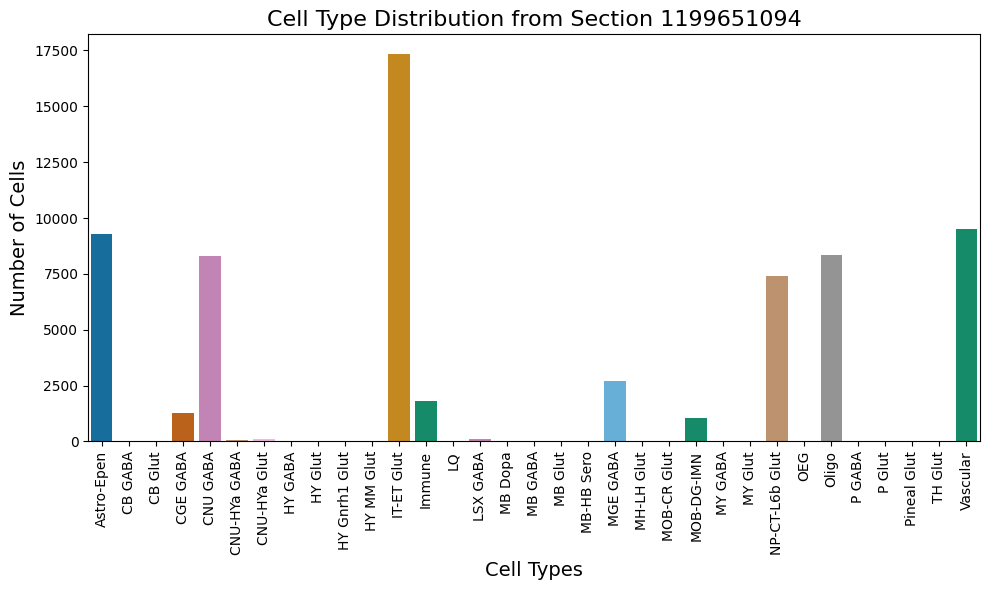

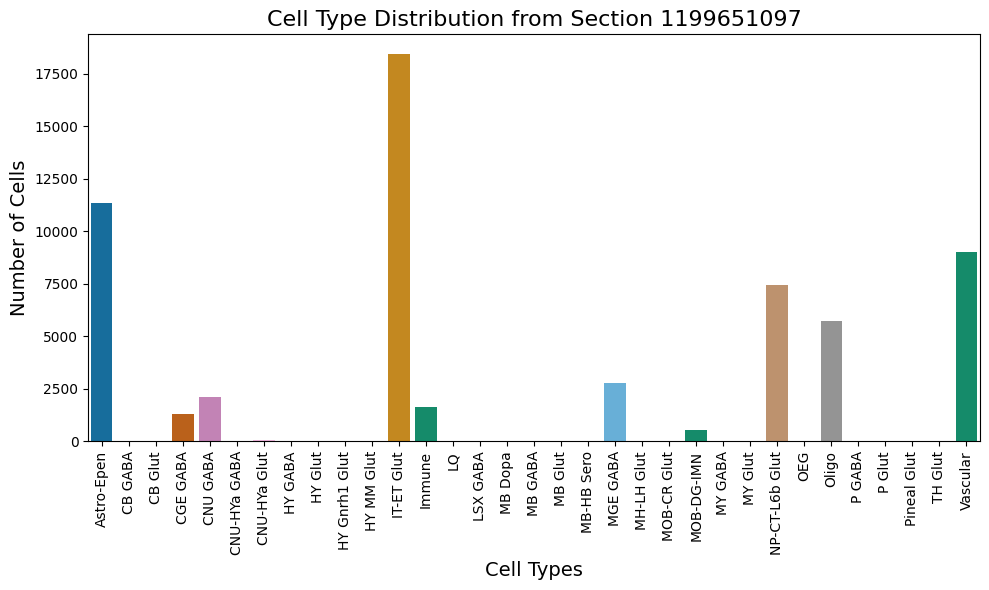

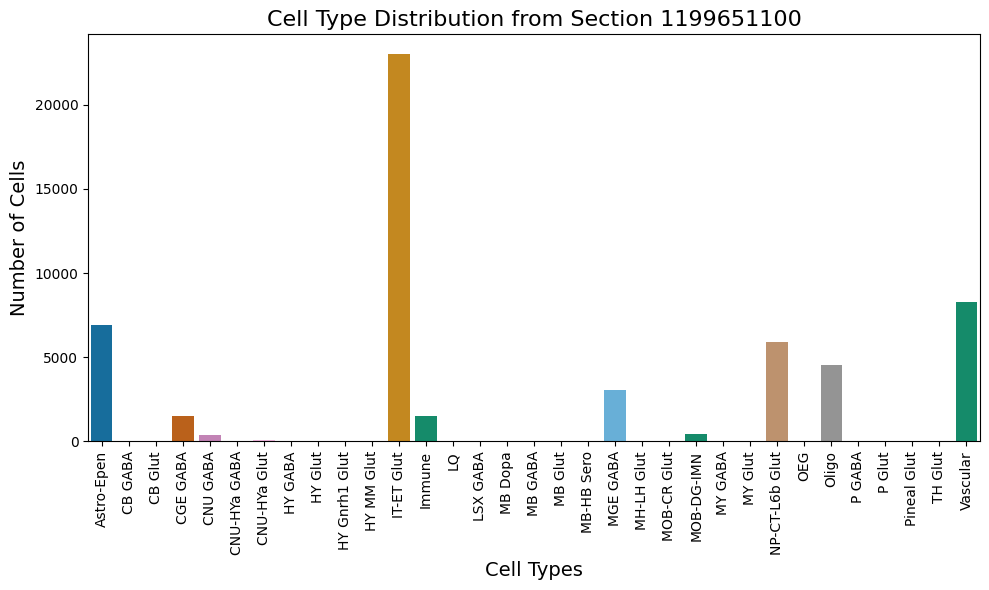

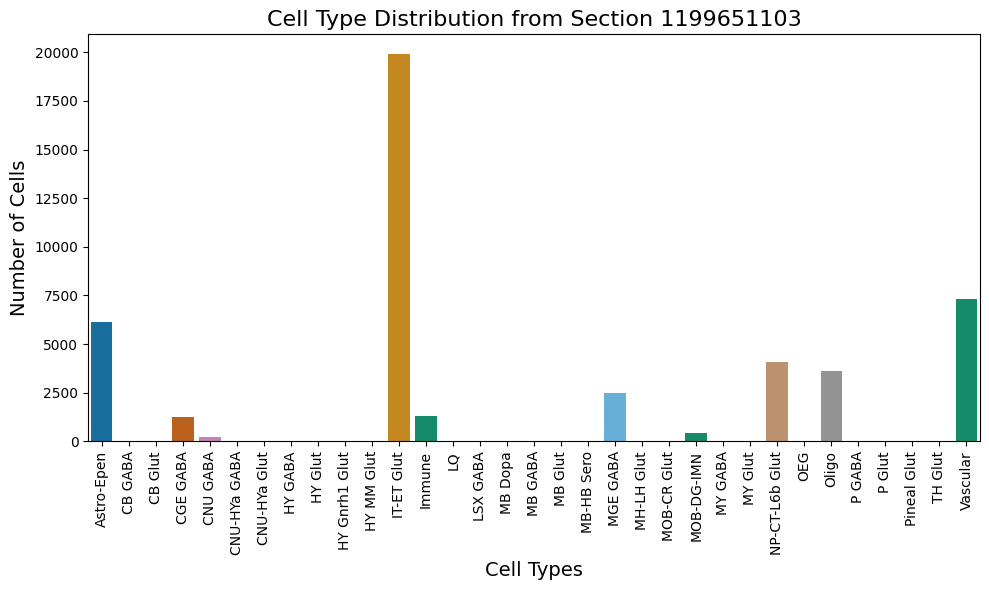

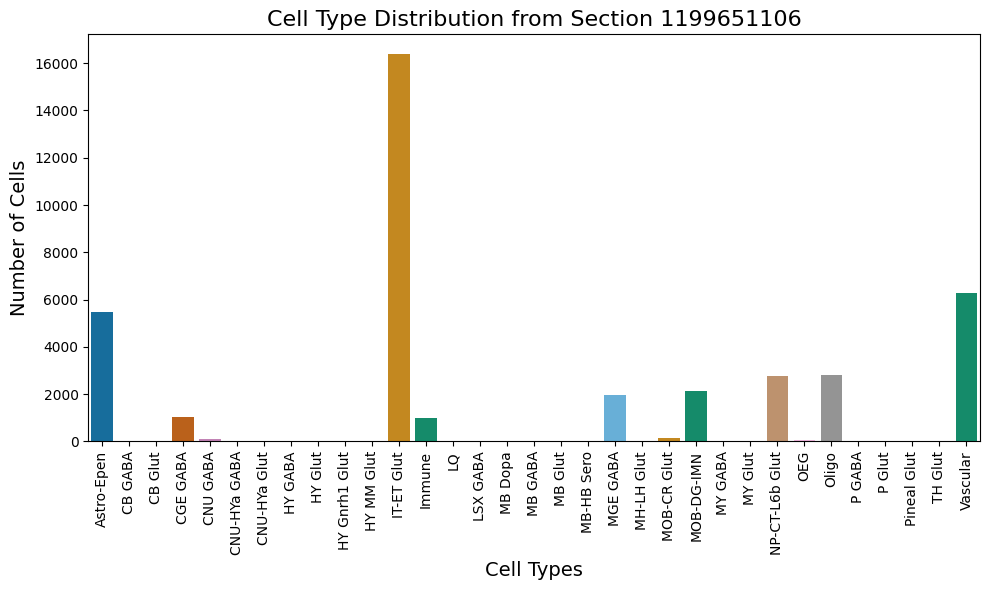

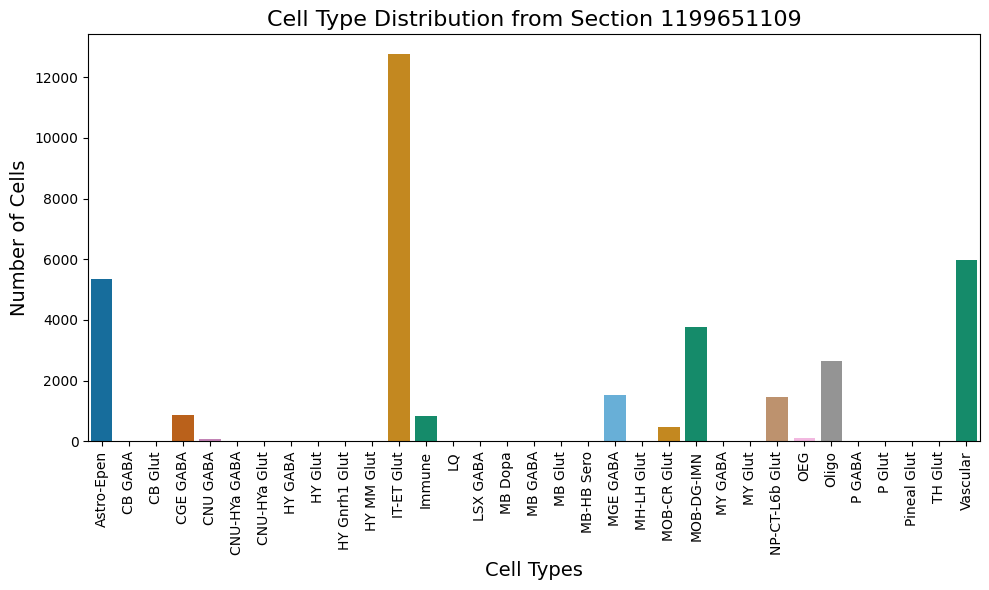

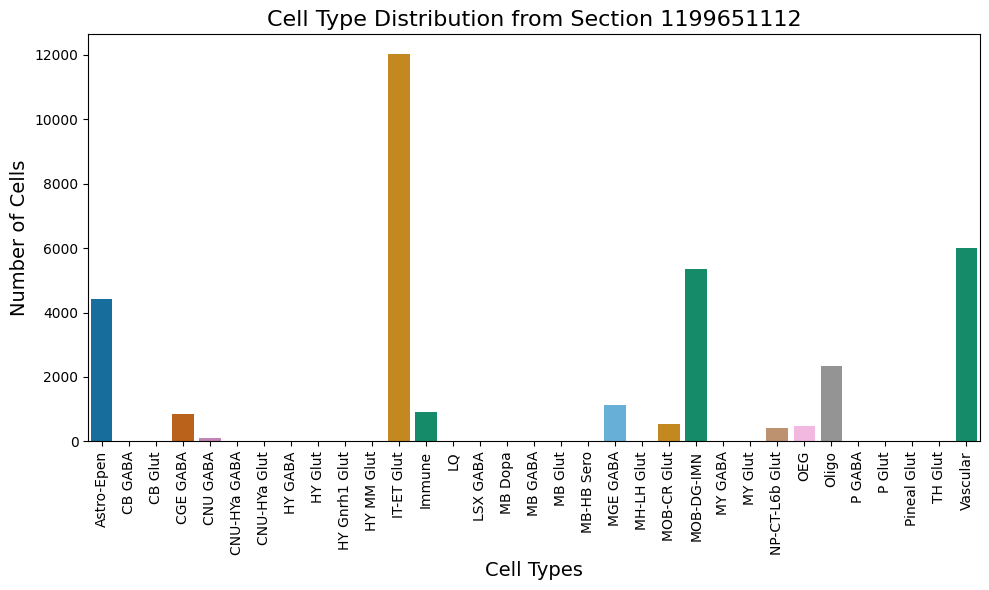

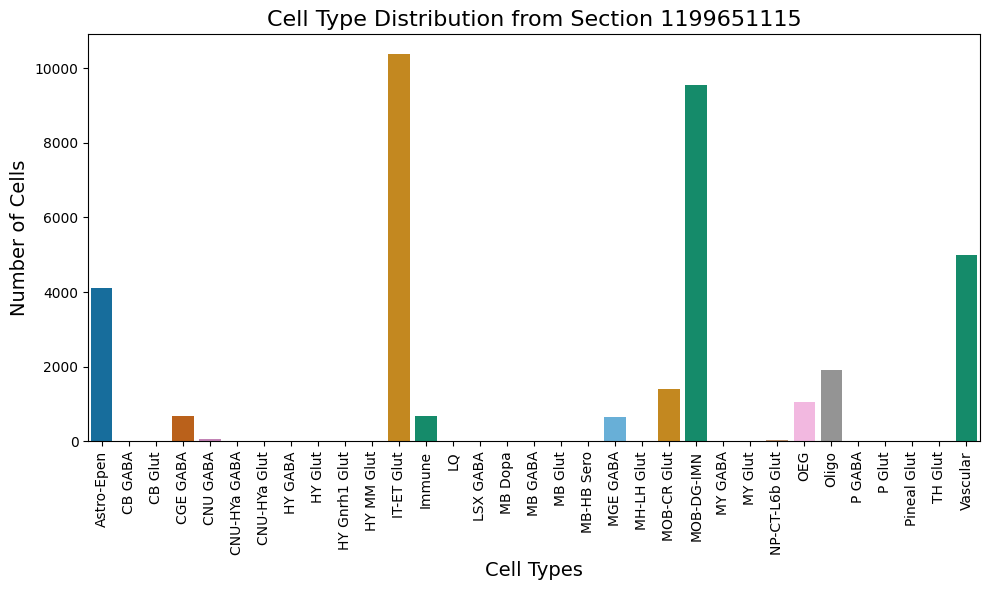

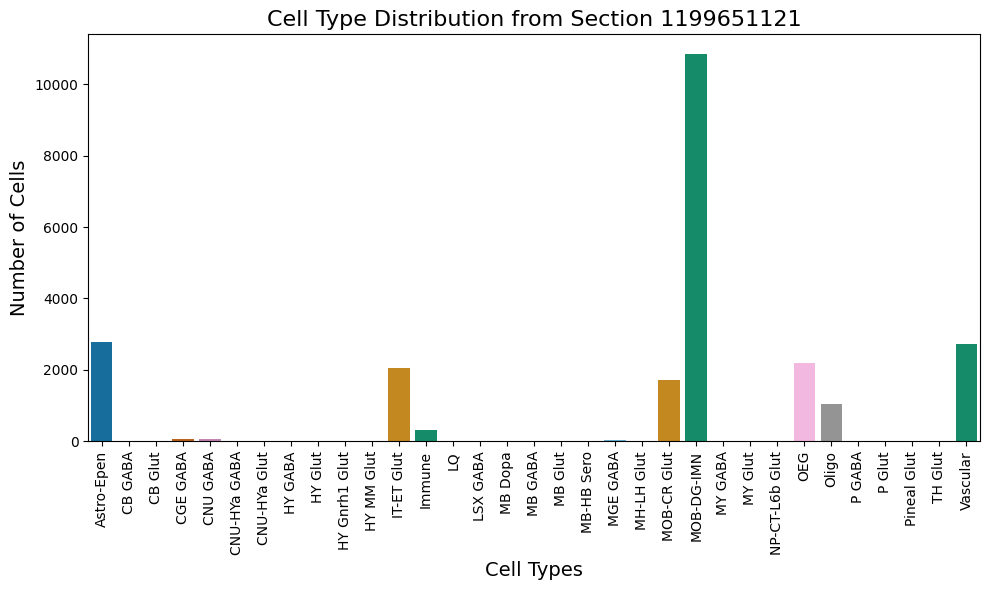

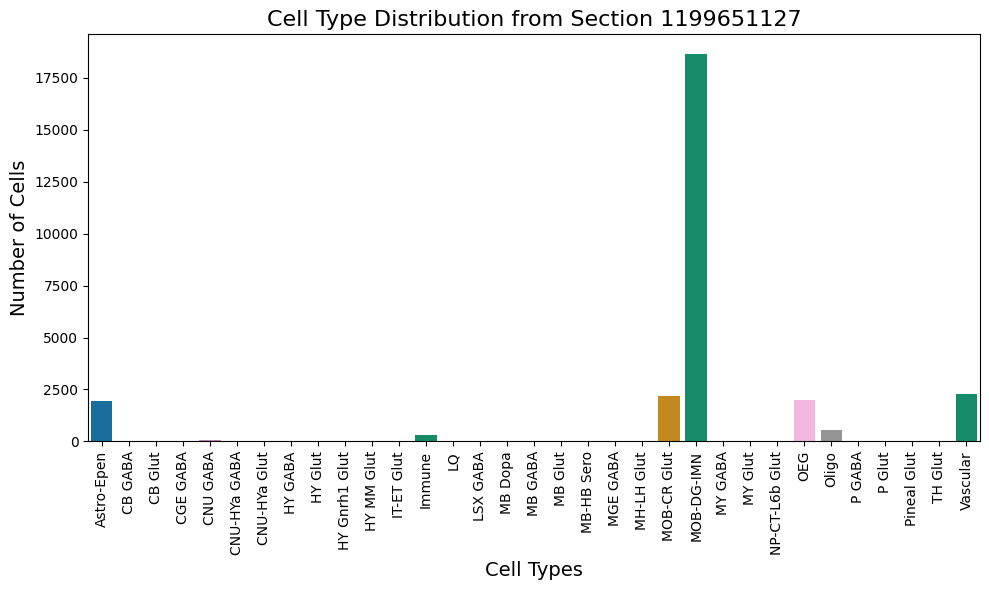

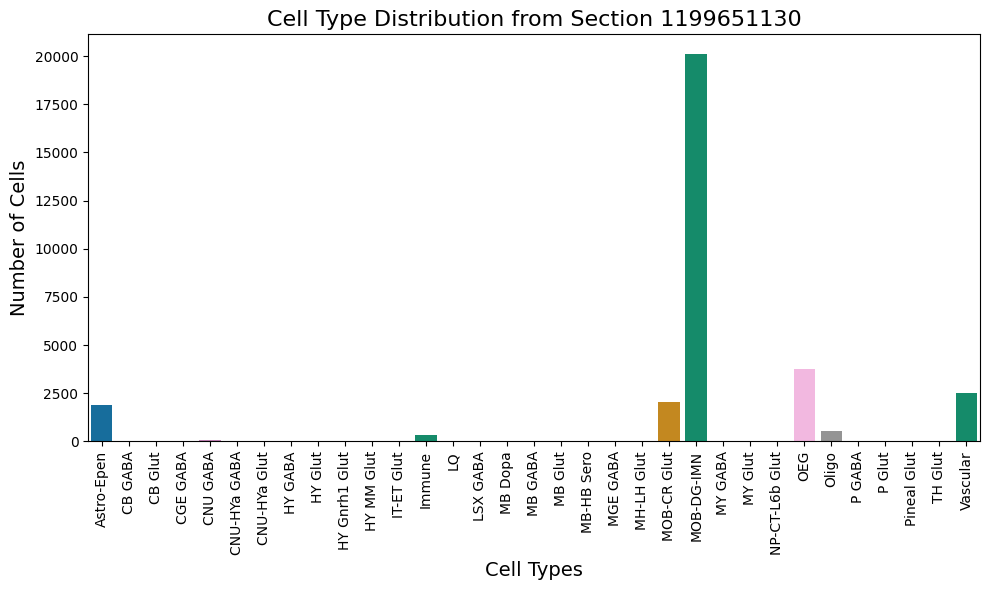

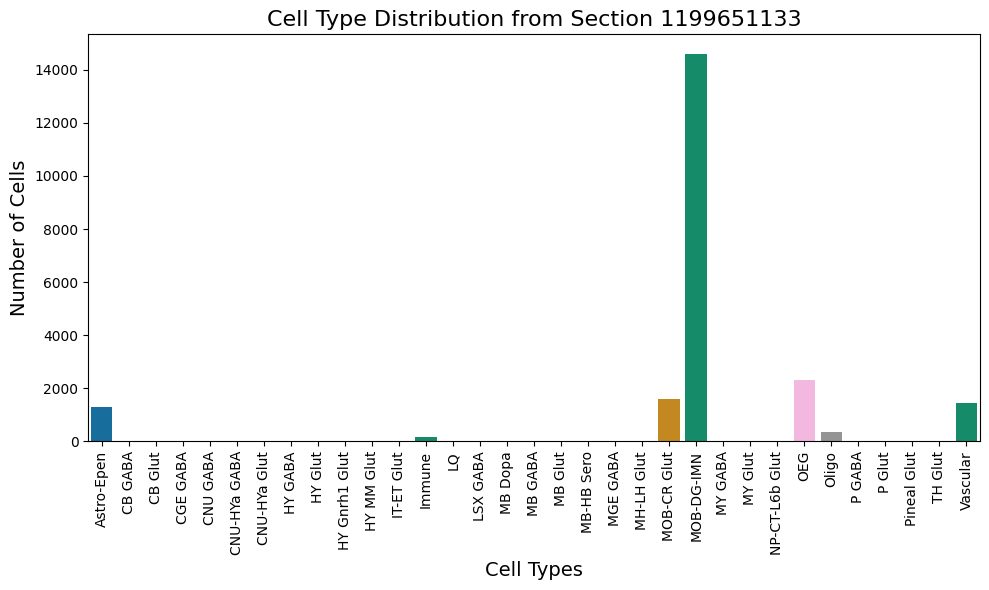

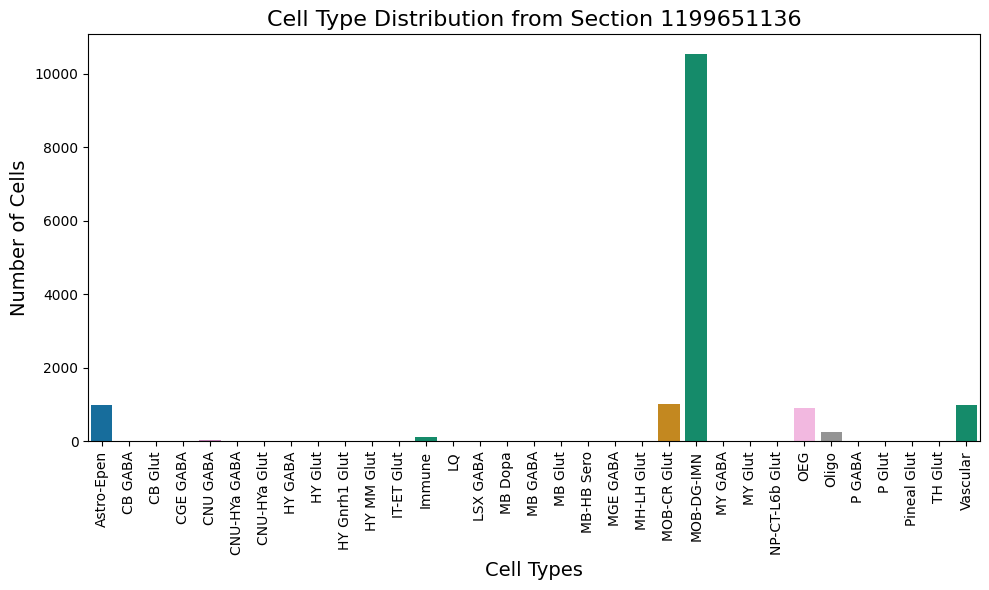

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure adata.obs is a DataFrame
df = adata.obs.copy()

# Get unique sections
sections = df['section'].cat.categories

# Set a color-blind-friendly palette
palette = sns.color_palette("colorblind")

# Loop through each section and create a plot
for section in sections:
    # Subset the data for the specific section
    subset = df[df['section'] == section]
    
    # Create the count plot with the color-blind-friendly palette
    plt.figure(figsize=(10, 6))
    sns.countplot(data=subset, x='class_label', palette=palette)
    plt.title(f'Cell Type Distribution from Section {section}',fontsize = 16)
    plt.xlabel('Cell Types', fontsize=14)
    plt.ylabel('Number of Cells', fontsize=14)
    plt.xticks(rotation=90, fontsize=10)
    
    # Adjust the layout to ensure everything fits
    plt.tight_layout()
    
    # Save the plot as an image (optional)
    plt.savefig(f'./data/celltype_plots/section_{section}_cell_type_distribution.png')


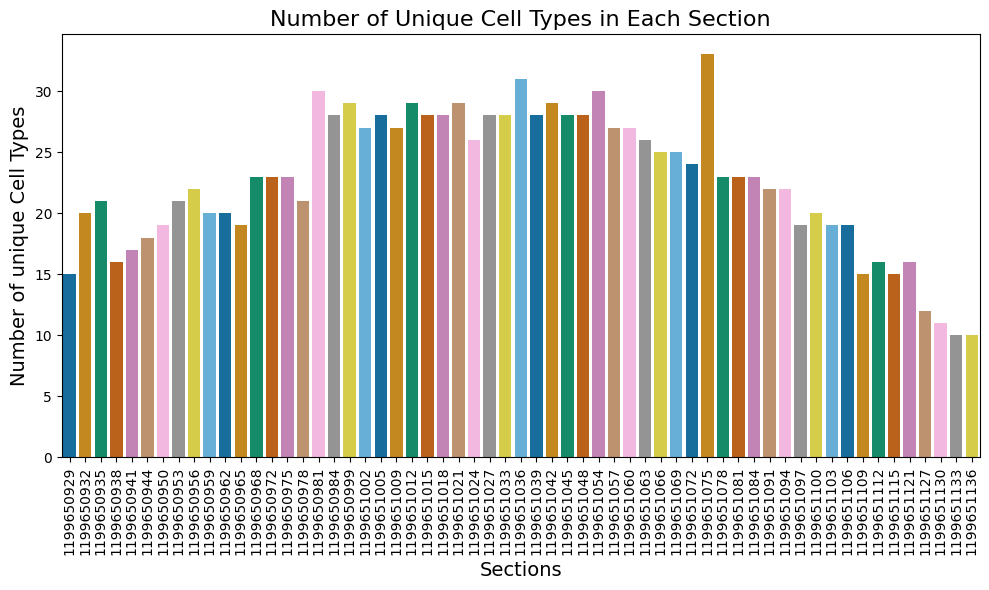

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure adata.obs is a DataFrame
df = adata.obs.copy()

# Count the unique cell types in each section
unique_cell_types_per_section = df.groupby('section')['class_label'].nunique().reset_index()
unique_cell_types_per_section.columns = ['Section', 'Number of unique Cell Types']

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_cell_types_per_section, x='Section', y='Number of unique Cell Types', palette=sns.color_palette("colorblind"))
plt.title('Number of Unique Cell Types in Each Section',fontsize = 16)
plt.xlabel('Sections', fontsize=14)
plt.ylabel('Number of unique Cell Types', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('./data/celltype_plots/unique_cell_types_per_section.png')

plt.show()

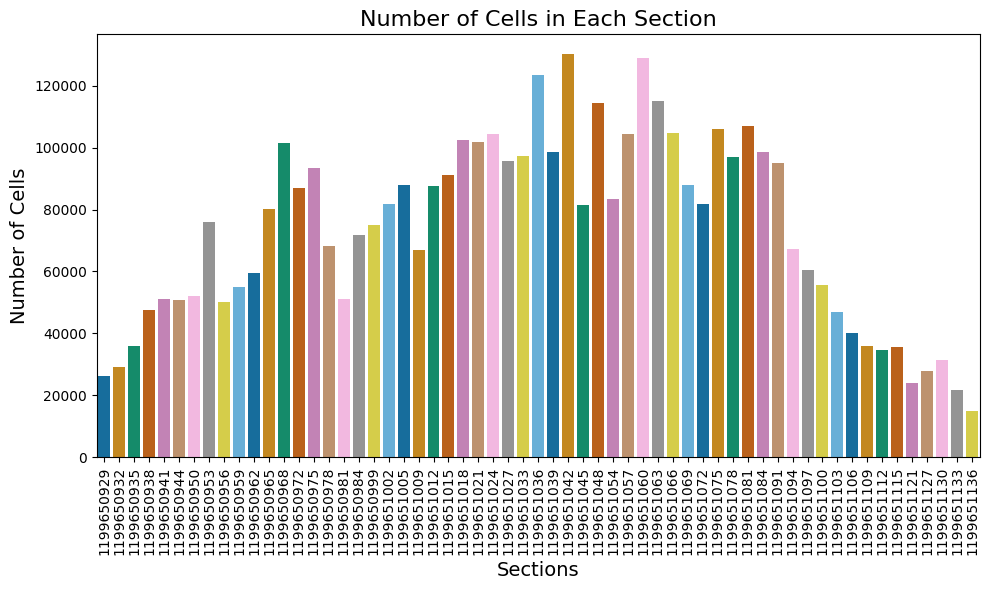

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure adata.obs is a DataFrame
df = adata.obs.copy()

# Count the total number of cells in each section
cells_per_section = df.groupby('section').size().reset_index()
cells_per_section.columns = ['Section', 'Number of Cells']

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=cells_per_section, x='Section', y='Number of Cells', palette=sns.color_palette("colorblind"))
plt.title('Number of Cells in Each Section', fontsize=16)
plt.xlabel('Sections', fontsize=14)
plt.ylabel('Number of Cells', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('./data/celltype_plots/cells_per_section.png')

plt.show()


/home/cheng-wei_liao/miniconda3/envs/master_prak/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:537: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


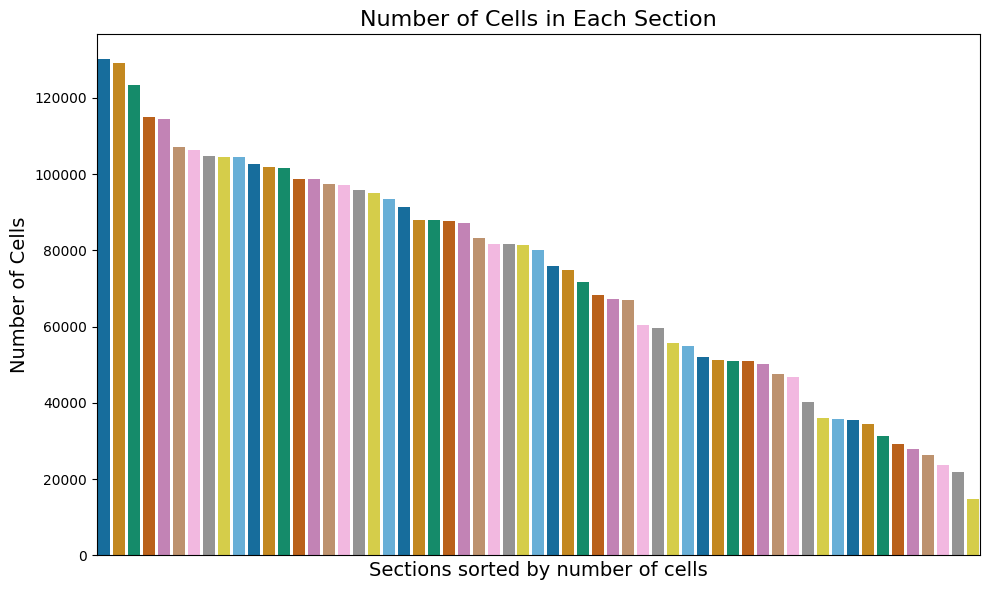

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure adata.obs is a DataFrame
df = adata.obs.copy()

# Count the total number of cells in each section
cells_per_section = df.groupby('section').size().reset_index()
cells_per_section.columns = ['Section', 'Number of Cells']

# Convert 'Section' to string type
cells_per_section['Section'] = cells_per_section['Section'].astype(str)

# Sort the DataFrame by the 'Number of Cells' column, in descending order
cells_per_section = cells_per_section.sort_values(by='Number of Cells', ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=cells_per_section, x='Section', y='Number of Cells', palette=sns.color_palette("colorblind"))
plt.title('Number of Cells in Each Section', fontsize=16)
plt.xlabel('Sections sorted by number of cells', fontsize=14)
plt.ylabel('Number of Cells', fontsize=14)

# Hide the x-axis text
plt.xticks([], [])

plt.tight_layout()

# Save the plot as an image (optional)
#plt.savefig('./data/celltype_plots/cells_per_section.png')

plt.show()


In [25]:
cell_type_stats

class_label          mean          std
0       Astro-Epen  12305.338983  6278.192678
1          CB GABA   2465.000000  4279.658958
2          CB Glut   3675.644068  8111.437533
3         CGE GABA    772.135593   651.714647
4         CNU GABA   4936.271186  9501.912892
5     CNU-HYa GABA    624.983051  1201.520452
6     CNU-HYa Glut    444.796610   868.623223
7          HY GABA    742.593220  1519.297343
8          HY Glut    505.000000  1088.279376
9    HY Gnrh1 Glut      1.322034     2.879420
10      HY MM Glut     66.830508   296.950022
11      IT-ET Glut  11525.779661  9644.946435
12          Immune   1356.067797   760.274312
13              LQ     55.372881    53.170480
14        LSX GABA    321.440678   846.426490
15         MB Dopa     85.423729   228.494035
16         MB GABA   1058.779661  1839.577801
17         MB Glut   1494.389831  2506.061245
18      MB-HB Sero     60.288136   129.644614
19        MGE GABA   1527.271186  1308.404396
20      MH-LH Glut    110.220339   347.445559
21     MOB-CR Glut    226.474576   511.726805
22      MOB-DG-IMN   2472.135593  4412.856786
23         MY GABA    880.203390  1201.558640
24         MY Glut    993.389831  1233.105765
25  NP-CT-L6b Glut   2959.593220  2782.053032
26             OEG    222.830508   688.329691
27           Oligo  10423.305085  5421.192378
28          P GABA    337.000000   550.841331
29          P Glut    493.050847   864.237823
30     Pineal Glut      3.372881    23.047102
31         TH Glut   1081.491525  2348.446723
32        Vascular   9232.779661  3491.311181

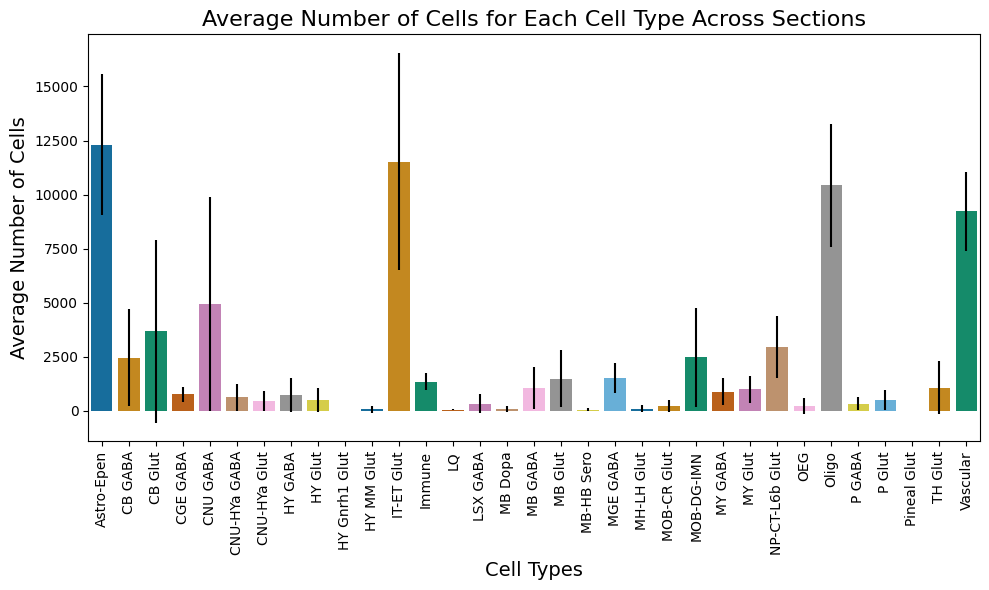

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
# Make sure adata.obs is a DataFrame
df = adata.obs.copy()

# Calculate the count for each cell type in each section
cell_type_counts = df.groupby(['section', 'class_label']).size().reset_index(name='count')

# Calculate the mean and confidence interval for each cell type across sections
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * data
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

cell_type_stats = cell_type_counts.groupby('class_label')['count'].apply(mean_confidence_interval).reset_index()
cell_type_stats[['mean', 'lower', 'upper']] = pd.DataFrame(cell_type_stats['count'].tolist(), index=cell_type_stats.index)
cell_type_stats.drop(columns=['count'], inplace=True)

# Plot the mean count for each cell type, with confidence intervals
plt.figure(figsize=(10, 6))
sns.barplot(data=cell_type_stats, x='class_label', y='mean', yerr=(cell_type_stats['upper'] - cell_type_stats['lower']), capsize=.2, palette=sns.color_palette("colorblind"))
plt.title('Average Number of Cells for Each Cell Type Across Sections', fontsize=16)
plt.xlabel('Cell Types', fontsize=14)
plt.ylabel('Average Number of Cells', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('./data/celltype_plots/average_cells_per_type.png')

plt.show()


In [31]:

# Step 3: Rank the sections based on closeness to the average number of cell types
section_ranks = mean_std_cell_types.apply(lambda x: abs(x - mean_cell_types).sum(), axis=1).rank().astype(int)
section_ranks = section_ranks.sort_values()

# Print the ranked sections
print("Sections ranked by closeness to the average number of cell types:")
print(section_ranks)

Sections ranked by closeness to the average number of cell types:
section
1199651009     1
1199650999     2
1199651054     3
1199651045     4
1199651094     5
1199651097     6
1199650981     7
1199651109     8
1199651002     9
1199651106    10
1199650956    11
1199651069    12
1199651112    13
1199650984    14
1199651015    15
1199651072    16
1199651103    17
1199651005    18
1199650959    19
1199651012    20
1199651100    21
1199651027    22
1199650962    23
1199651039    24
1199650978    25
1199650935    26
1199650950    27
1199651033    28
1199650929    29
1199650932    30
1199651078    31
1199651115    32
1199650944    33
1199651057    34
1199651021    35
1199651018    36
1199651084    37
1199651066    38
1199650938    39
1199651024    40
1199651091    41
1199650941    42
1199651075    43
1199651048    44
1199651081    45
1199650953    46
1199651063    47
1199650972    48
1199651121    49
1199650965    50
1199651036    51
1199650975    52
1199651136    53
1199651042    54
11996511